# <span style="color:red">Projet Analyse de données : Partie 1</span>

## Résumé du sujet
 
🧑‍🏫 Contexte : Travaillant chez Spotify, vous gérez les comptes familiaux. Un problème critique survient : un virus supprime les playlists personnalisées des utilisateurs. Vous avez le choix entre la démission et l'utilisation de compétences en machine learning pour restaurer automatiquement les playlists.

Objectifs : Utiliser l'analyse de données pour recréer automatiquement les playlists perdues.


## Les librairies
<br/>
Importation des librairies nécessaires.

In [78]:
# On vérifie qu'on a bien une distribution Python ≥3.8
import sys
assert sys.version_info >= (3, 8)

# Les classiques
import numpy as np
import pandas as pd

# Pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
from pandas.plotting import scatter_matrix
# pour apporter un peu de dynamique aux graphiques
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D

# On vérifie qu'on a bien une distribution Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"
import yellowbrick

# Normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Machine learning
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
import scipy
# métriques
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist


import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


## Les données
<br/>
Contexte : Les données sont fournies dans les fichiers unlabelled_mix.csv et predict_one.csv.

Objectifs : Comprendre la structure et la nature des données pour préparer l'analyse.

Activités : 
<br/>
-Explorer le fichier unlabelled_mix.csv pour comprendre les données non labellisées.
<br/>
-Identifier les variables pertinentes pour recréer les playlists.
<br/>
-Examiner le fichier predict_one.csv pour comprendre les données à prédire.
<br/>
-Nettoyer les données non labellisées (unlabelled_mix.csv) en traitant les valeurs manquantes.



In [79]:
# Extraction des données contenues dans le fichier unlabelled_mix.csv
df = pd.read_csv('unlabelled_mix.csv').dropna()
df = df.reset_index(drop=True)
#Affichage des données chargées
df

name  \
0       Concierto De Aranjuez   
1                  Formidable   
2            La Grande classe   
3              Jailhouse Rock   
4                       Human   
...                       ...   
3785                   Angela   
3786        Sunday With A Flu   
3787  J'suis pas dans le Game   
3788              Cyber Party   
3789                    JAUNÉ   

                                                 album              artist  \
0     Concierto (CTI Records 40th Anniversary Edition)            Jim Hall   
1                                           Formidable           La Bronze   
2                                 Le Code De L'horreur               Rohff   
3            TPH Production Perform The Blues Brothers  The Blues Brothers   
4                                       Human (Deluxe)      Rag'n'Bone Man   
...                                                ...                 ...   
3785                                    Chaise pliante               Hatik   
3786                                      Tree Of Life            Yodelice   
3787                                          L'Apogée     Sexion d'Assaut   
3788                                   Distant Reality            Shirobon   
3789                                             JAUNÉ               Booba   

     release_date   length  popularity  acousticness  danceability  energy  \
0            1975  1160400          38       0.92800         0.516   0.165   
1      2016-04-14   206632          32       0.43600         0.576   0.402   
2      2008-12-12   275893          42       0.07590         0.706   0.961   
3      2005-08-08   206393           0       0.22700         0.594   0.759   
4      2017-02-10   200186          82       0.39300         0.602   0.707   
...           ...      ...         ...           ...           ...     ...   
3785   2019-08-30   236000          61       0.70200         0.650   0.469   
3786   2009-01-01   137093          60       0.17500         0.632   0.672   
3787   2012-11-19   261853          36       0.11100         0.854   0.631   
3788   2014-02-04   166779           0       0.00238         0.722   0.895   
3789   2020-05-11   215947          56       0.13700         0.793   0.570   

      instrumentalness  ...  loudness  speechiness    tempo  valence  \
0             0.878000  ...   -22.397       0.0354  130.431   0.2280   
1             0.000067  ...    -8.595       0.0441  139.792   0.0684   
2             0.000000  ...    -2.723       0.1730   86.509   0.5120   
3             0.000570  ...    -9.884       0.0514   89.995   0.9440   
4             0.000000  ...    -4.097       0.3020   75.087   0.5540   
...                ...  ...       ...          ...      ...      ...   
3785          0.249000  ...    -8.676       0.1840  191.853   0.3780   
3786          0.000073  ...    -6.963       0.0406  174.162   0.9270   
3787          0.000000  ...    -5.184       0.1150   76.014   0.3580   
3788          0.734000  ...    -6.533       0.0353  117.974   0.4420   
3789          0.000000  ...    -8.852       0.1500  140.003   0.6550   

      time_signature  key  mode                                   uri  \
0                  4    2     0  spotify:track:0QVvZNHwBOPAGXgUfkfL5P   
1                  4    7     0  spotify:track:6b6EZlsyiCpCBWj2ZCOnmX   
2                  4   10     0  spotify:track:7apoo5ErcVtXaLdOkGdh1q   
3                  4    9     0  spotify:track:1fnGQ8O5hrmg14QGnPzLR2   
4                  4    9     1  spotify:track:58zsLZPvfflaiIbNWoA22O   
...              ...  ...   ...                                   ...   
3785               4    2     0  spotify:track:6ab3CQvDlAVttThZucwGQ1   
3786               4    2     0  spotify:track:05pU63DL8dSAApA8amj0ql   
3787               4    6     1  spotify:track:5rftQabJ357Yn3WAEts6T0   
3788               4    1     1  spotify:track:5wszrErn3CKFkARtskv5V2   
3789               4    1     1  spotify:track:4fW3EMRzAfj8aNMsF3zMwt   

     release

On s'est rendu compte que certains morceaux (au nombre de 9) avait une durée nulle. Le .dropna permet de retirer ces données incohérentes

In [80]:
# Extraction des données contenues dans le fichier predict_one.csv
df_predict = pd.read_csv('predict_one.csv',sep=';').dropna()
df_predict = df_predict.reset_index(drop=True)
#Affichage des données chargées
df_predict

name  \
0              Autumn Leaves   
1            Blues sur Seine   
2        Le jardin des F√©es   
3                   El Ciego   
4                 Jenny Wren   
..                       ...   
95               Sang M√™l√©   
96                    Maryan   
97  Moon Over Bourbon Street   
98           No Woman No Cry   
99              Tadow - Edit   

                                                album              artist  \
0                                          Summerwind     Lars Danielsson   
1                                    Mare Nostrum III         Paolo Fresu   
2                                    Mare Nostrum III         Paolo Fresu   
3                                         P60LO FR3SU         Paolo Fresu   
4                                         Chimichurri  Baptiste Trotignon   
..                                                ...                 ...   
95                                       Face to Face         Eddy Louiss   
96                                             Shleep        Robert Wyatt   
97                      The Dream Of The Blue Turtles               Sting   
98  Harlem-Kingston Express (Live at Dizzy's Club ...     Monty Alexander   
99                                              Tadow              Masego   

   release_date  length  popularity  acousticness  danceability  energy  \
0    28/09/2018  237984          36         0.974         0.370  0.0548   
1    25/01/2019  293609          33         0.988         0.336  0.0275   
2    25/01/2019  312062          27         0.989         0.273  0.1390   
3    10/02/2021  341391           3         0.956         0.579  0.2940   
4    23/09/2016  234986          32         0.851         0.421  0.2020   
..          ...     ...         ...           ...           ...     ...   
95   06/11/2001  305840           7         0.871         0.619  0.4620   
96         1997  371093          26         0.798         0.479  0.3220   
97   01/01/1985  240306          50         0.670         0.413  0.0563   
98   14/06/2011  426053          31         0.683         0.536  0.4340   
99   27/07/2020  214880          39         0.693         0.542  0.5430   

    instrumentalness  ...  loudness  speechiness    tempo  valence  \
0           0.112000  ...   -18.349       0.0385   65.250   0.3760   
1           0.648000  ...   -18.082       0.0422   76.567   0.2660   
2           0.926000  ...   -15.384       0.0368  132.169   0.1030   
3           0.494000  ...   -11.119       0.0700  105.913   0.4850   
4           0.948000  ...   -19.460       0.0399   97.266   0.3240   
..               ...  ...       ...          ...      ...      ...   
95          0.567000  ...    -9.694       0.0532  108.602   0.6480   
96          0.374000  ...   -14.819       0.0295  115.140   0.0943   
97          0.000126  ...   -22.264       0.0410  124.977   0.1830   
98          0.926000  ...   -15.181       0.0353   87.011   0.3650   
99          0.000044  ...    -4.646       0.1320  121.356   0.3460   

    time_signature  key  mode                                   uri  \
0                4    7     0  spotify:track:5rXJ6iWGWLEOBHGtdBvDlV   
1                3    9     0  spotify:track:2mEsVtCXgm4NbnIiRC3sdK   
2                3    9     0  spotify:track:3mvDItSAf5SeniJ1hdJf8w   
3                4    2     0  spotify:track:5Mfrusx5JOup56lSbJl5gq   
4                4    5     0  spotify:track:1Kf83SdGMMFnoPj6oQbLN3   
..             ...  ...   ...                                   ...   
95               3    5     0  spotify:track:5x2JOUmS1Xcn2du5LziV5E   
96               1    2     1  spotify:track:4epAz872eTEixF8kEnTTS2   
97               4    5     0  spotify:track:3KF1EXX2zGfVtGeZKiClB0   
98               4    0     1  spotify:track:5RdShEqRmAFgiCwplAWS81   
99               4    9     0  spotify:track:5RgNhmyaWYtuIioRVoQzMR   

   release_year   top_year  
0          2018       2022  
1          2019       2022  
2          2019       2022  
3  

In [81]:
#Affichage des informations de la Datafram 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3790 non-null   object 
 1   album             3790 non-null   object 
 2   artist            3790 non-null   object 
 3   release_date      3790 non-null   object 
 4   length            3790 non-null   int64  
 5   popularity        3790 non-null   int64  
 6   acousticness      3790 non-null   float64
 7   danceability      3790 non-null   float64
 8   energy            3790 non-null   float64
 9   instrumentalness  3790 non-null   float64
 10  liveness          3790 non-null   float64
 11  loudness          3790 non-null   float64
 12  speechiness       3790 non-null   float64
 13  tempo             3790 non-null   float64
 14  valence           3790 non-null   float64
 15  time_signature    3790 non-null   int64  
 16  key               3790 non-null   int64  


In [82]:
# Afficher la description des données pour avoir une vue d'ensemble
df.describe(include='all')

name                 album           artist  \
count                   3790                  3790             3790   
unique                  3010                  2070             1393   
top     Les gens qui doutent  Mercury - Acts 1 & 2  Various Artists   
freq                       7                    31              115   
mean                     NaN                   NaN              NaN   
std                      NaN                   NaN              NaN   
min                      NaN                   NaN              NaN   
25%                      NaN                   NaN              NaN   
50%                      NaN                   NaN              NaN   
75%                      NaN                   NaN              NaN   
max                      NaN                   NaN              NaN   

       release_date        length   popularity  acousticness  danceability  \
count          3790  3.790000e+03  3790.000000   3790.000000   3790.000000   
unique         1292           NaN          NaN           NaN           NaN   
top      2013-01-01           NaN          NaN           NaN           NaN   
freq             39           NaN          NaN           NaN           NaN   
mean            NaN  2.420262e+05    32.185224      0.416510      0.556712   
std             NaN  9.981331e+04    25.092597      0.361441      0.192143   
min             NaN  3.105300e+04     0.000000      0.000001      0.000000   
25%             NaN  1.877470e+05     1.000000      0.053925      0.427250   
50%             NaN  2.236265e+05    34.000000      0.324000      0.578000   
75%             NaN  2.719685e+05    51.000000      0.781000      0.703000   
max             NaN  1.921683e+06    91.000000      0.996000      0.971000   

             energy  instrumentalness  ...     loudness  speechiness  \
count   3790.000000       3790.000000  ...  3790.000000  3790.000000   
unique          NaN               NaN  ...          NaN          NaN   
top             NaN               NaN  ...          NaN          NaN   
freq            NaN               NaN  ...          NaN          NaN   
mean       0.528927          0.289336  ...   -10.280537     0.085892   
std        0.263920          0.384017  ...     6.136521     0.093285   
min        0.000545          0.000000  ...   -42.117000     0.000000   
25%        0.323500          0.000003  ...   -12.522000     0.036800   
50%        0.553500          0.004620  ...    -8.489500     0.047300   
75%        0.742750          0.755000  ...    -6.147750     0.087575   
max        0.995000          0.995000  ...     0.532000     0.952000   

              tempo      valence  time_signature          key         mode  \
count   3790.000000  3790.000000     3790.000000  3790.000000  3790.000000   
unique          NaN          NaN             NaN          NaN          NaN   
top             NaN          NaN             NaN          NaN          NaN   
freq            NaN          NaN             NaN          NaN          NaN   
mean     116.039863     0.385360        3.876781     5.281530     0.467810   
std       28.705071     0.254865        0.458190     3.508787     0.499029   
min        0.000000     0.000000        0.000000     0.000000     0.000000   
25%       94.727750     0.161250        4.000000     2.000000     0.000000   
50%      115.544500     0.355500        4.000000     5.000000     0.000000   
75%      132.033000     0.574750        4.000000     8.000000     1.000000   
max      209.596000     0.981000        5.000000    11.000000     1.000000   

                                         uri release_year     top_year  
count                                   3790  3790.000000  3790.000000  
unique                                  3195          NaN          NaN  
top     spotify:track:0ryCUTEfm6MF6jC3jZwT2H          NaN          NaN  
freq                                       5          NaN          NaN  
mean                                     NaN  2012.878892  2019.158

In [83]:
#Reperage des colonnes avec des données manquantes
df.isna().sum()

name                0
album               0
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
release_year        0
top_year            0
dtype: int64

In [84]:
#Suppression des colonnes avec des données manquantes et de celles avec des valeurs non-numériques
df1=df.drop(columns=['uri','name','album','artist', 'release_date', 'top_year'])

df1 #Affichage

length  popularity  acousticness  danceability  energy  \
0     1160400          38       0.92800         0.516   0.165   
1      206632          32       0.43600         0.576   0.402   
2      275893          42       0.07590         0.706   0.961   
3      206393           0       0.22700         0.594   0.759   
4      200186          82       0.39300         0.602   0.707   
...       ...         ...           ...           ...     ...   
3785   236000          61       0.70200         0.650   0.469   
3786   137093          60       0.17500         0.632   0.672   
3787   261853          36       0.11100         0.854   0.631   
3788   166779           0       0.00238         0.722   0.895   
3789   215947          56       0.13700         0.793   0.570   

      instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0             0.878000    0.1090   -22.397       0.0354  130.431   0.2280   
1             0.000067    0.1010    -8.595       0.0441  139.792   0.0684   
2             0.000000    0.3340    -2.723       0.1730   86.509   0.5120   
3             0.000570    0.2930    -9.884       0.0514   89.995   0.9440   
4             0.000000    0.1650    -4.097       0.3020   75.087   0.5540   
...                ...       ...       ...          ...      ...      ...   
3785          0.249000    0.1060    -8.676       0.1840  191.853   0.3780   
3786          0.000073    0.1250    -6.963       0.0406  174.162   0.9270   
3787          0.000000    0.0972    -5.184       0.1150   76.014   0.3580   
3788          0.734000    0.0899    -6.533       0.0353  117.974   0.4420   
3789          0.000000    0.1010    -8.852       0.1500  140.003   0.6550   

      time_signature  key  mode  release_year  
0                  4    2     0          1975  
1                  4    7     0          2016  
2                  4   10     0          2008  
3                  4    9     0          2005  
4                  4    9     1          2017  
...              ...  ...   ...           ...  
3785               4    2     0          2019  
3786               4    2     0          2009  
3787               4    6     1          2012  
3788               4    1     1          2014  
3789               4    1     1          2020  

[3790 rows x 15 columns]

In [85]:
df_predict.describe(include='all')

name             album       artist release_date  \
count             100               100          100          100   
unique             99                96           88           87   
top     Autumn Leaves  Mare Nostrum III  Paolo Fresu   13/05/2022   
freq                2                 2            3            4   
mean              NaN               NaN          NaN          NaN   
std               NaN               NaN          NaN          NaN   
min               NaN               NaN          NaN          NaN   
25%               NaN               NaN          NaN          NaN   
50%               NaN               NaN          NaN          NaN   
75%               NaN               NaN          NaN          NaN   
max               NaN               NaN          NaN          NaN   

              length  popularity  acousticness  danceability      energy  \
count   1.000000e+02  100.000000    100.000000    100.000000  100.000000   
unique           NaN         NaN           NaN           NaN         NaN   
top              NaN         NaN           NaN           NaN         NaN   
freq             NaN         NaN           NaN           NaN         NaN   
mean    3.350968e+05   25.190000      0.751440      0.471481    0.300949   
std     1.994187e+05   15.777298      0.257923      0.168591    0.223973   
min     7.255700e+04    0.000000      0.070000      0.064100    0.006950   
25%     2.318265e+05   11.750000      0.605500      0.348000    0.105500   
50%     2.961770e+05   28.000000      0.870000      0.459500    0.259000   
75%     3.758710e+05   37.250000      0.965750      0.605750    0.451500   
max     1.315970e+06   60.000000      0.996000      0.912000    0.941000   

        instrumentalness  ...    loudness  speechiness       tempo  \
count         100.000000  ...  100.000000   100.000000  100.000000   
unique               NaN  ...         NaN          NaN         NaN   
top                  NaN  ...         NaN          NaN         NaN   
freq                 NaN  ...         NaN          NaN         NaN   
mean            0.578454  ...  -16.365710     0.058164  107.734110   
std             0.374885  ...    6.082348     0.061199   25.852936   
min             0.000000  ...  -34.227000     0.025300   62.281000   
25%             0.101825  ...  -19.682750     0.036700   87.555750   
50%             0.776000  ...  -15.402000     0.041850  107.449000   
75%             0.890500  ...  -12.324250     0.051375  124.394000   
max             0.964000  ...   -4.646000     0.444000  170.665000   

           valence  time_signature         key       mode  \
count   100.000000      100.000000  100.000000  100.00000   
unique         NaN             NaN         NaN        NaN   
top            NaN             NaN         NaN        NaN   
freq           NaN             NaN         NaN        NaN   
mean      0.357376        3.760000    5.830000    0.43000   
std       0.247698        0.683426    3.414334    0.49757   
min       0.035900        1.000000    0.000000    0.00000   
25%       0.142500        4.000000    4.000000    0.00000   
50%       0.335000        4.000000    7.000000    0.00000   
75%       0.530000        4.000000    9.000000    1.00000   
max       0.949000        5.000000   11.000000    1.00000   

                                         uri release_year   top_year  
count                                    100   100.000000      100.0  
unique                                   100          NaN        NaN  
top     spotify:track:5rXJ6iWGWLEOBHGtdBvDlV          NaN        NaN  
freq                                       1          NaN        NaN  
mean                                     NaN  2007.790000     2022.0  
std                                      NaN    16.089582        0.0  
min                                      NaN  1960.000000     2022.0  
25%                                      NaN  1999.750000     2022.0  
50%                                      NaN  2014.000000     

In [86]:
#Suppression des colonnes avec des données manquantes et de celles avec des valeurs non-numériques
df1_predict=df_predict.drop(columns=['uri','name','album','artist','release_date',' top_year'])

df1_predict #Affichage

length  popularity  acousticness  danceability  energy  instrumentalness  \
0   237984          36         0.974         0.370  0.0548          0.112000   
1   293609          33         0.988         0.336  0.0275          0.648000   
2   312062          27         0.989         0.273  0.1390          0.926000   
3   341391           3         0.956         0.579  0.2940          0.494000   
4   234986          32         0.851         0.421  0.2020          0.948000   
..     ...         ...           ...           ...     ...               ...   
95  305840           7         0.871         0.619  0.4620          0.567000   
96  371093          26         0.798         0.479  0.3220          0.374000   
97  240306          50         0.670         0.413  0.0563          0.000126   
98  426053          31         0.683         0.536  0.4340          0.926000   
99  214880          39         0.693         0.542  0.5430          0.000044   

    liveness  loudness  speechiness    tempo  valence  time_signature  key  \
0     0.0952   -18.349       0.0385   65.250   0.3760               4    7   
1     0.1940   -18.082       0.0422   76.567   0.2660               3    9   
2     0.1190   -15.384       0.0368  132.169   0.1030               3    9   
3     0.2080   -11.119       0.0700  105.913   0.4850               4    2   
4     0.0977   -19.460       0.0399   97.266   0.3240               4    5   
..       ...       ...          ...      ...      ...             ...  ...   
95    0.1090    -9.694       0.0532  108.602   0.6480               3    5   
96    0.3310   -14.819       0.0295  115.140   0.0943               1    2   
97    0.1020   -22.264       0.0410  124.977   0.1830               4    5   
98    0.7870   -15.181       0.0353   87.011   0.3650               4    0   
99    0.0951    -4.646       0.1320  121.356   0.3460               4    9   

    mode  release_year  
0      0          2018  
1      0          2019  
2      0          2019  
3      0          2021  
4      0          2016  
..   ...           ...  
95     0          2001  
96     1          1997  
97     0          1985  
98     1          2011  
99     0          2020  

[100 rows x 15 columns]

In [87]:
# Affichage de la description des nouvelles données pour vérifier ce qui a été fait plus haut
df1.describe(include='all')

length   popularity  acousticness  danceability       energy  \
count  3.790000e+03  3790.000000   3790.000000   3790.000000  3790.000000   
mean   2.420262e+05    32.185224      0.416510      0.556712     0.528927   
std    9.981331e+04    25.092597      0.361441      0.192143     0.263920   
min    3.105300e+04     0.000000      0.000001      0.000000     0.000545   
25%    1.877470e+05     1.000000      0.053925      0.427250     0.323500   
50%    2.236265e+05    34.000000      0.324000      0.578000     0.553500   
75%    2.719685e+05    51.000000      0.781000      0.703000     0.742750   
max    1.921683e+06    91.000000      0.996000      0.971000     0.995000   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       3790.000000  3790.000000  3790.000000  3790.000000  3790.000000   
mean           0.289336     0.166635   -10.280537     0.085892   116.039863   
std            0.384017     0.142760     6.136521     0.093285    28.705071   
min            0.000000     0.017900   -42.117000     0.000000     0.000000   
25%            0.000003     0.094500   -12.522000     0.036800    94.727750   
50%            0.004620     0.112000    -8.489500     0.047300   115.544500   
75%            0.755000     0.172000    -6.147750     0.087575   132.033000   
max            0.995000     0.991000     0.532000     0.952000   209.596000   

           valence  time_signature          key         mode  release_year  
count  3790.000000     3790.000000  3790.000000  3790.000000   3790.000000  
mean      0.385360        3.876781     5.281530     0.467810   2012.878892  
std       0.254865        0.458190     3.508787     0.499029     10.197359  
min       0.000000        0.000000     0.000000     0.000000   1957.000000  
25%       0.161250        4.000000     2.000000     0.000000   2012.000000  
50%       0.355500        4.000000     5.000000     0.000000   2016.000000  
75%       0.574750        4.000000     8.000000     1.000000   2018.000000  
max       0.981000        5.000000    11.000000     1.000000   2022.000000

## Analyse exploratoire des données

Contexte : Les données doivent être préparées pour l'analyse.

Objectifs : Formater les données pour les rendre utilisables par les modèles de machine learning.

Activités :
<br/>
-Transformer les données pour les adapter au modèle de machine learning.
<br/>
-Créer des ensembles d'entraînement et de test.

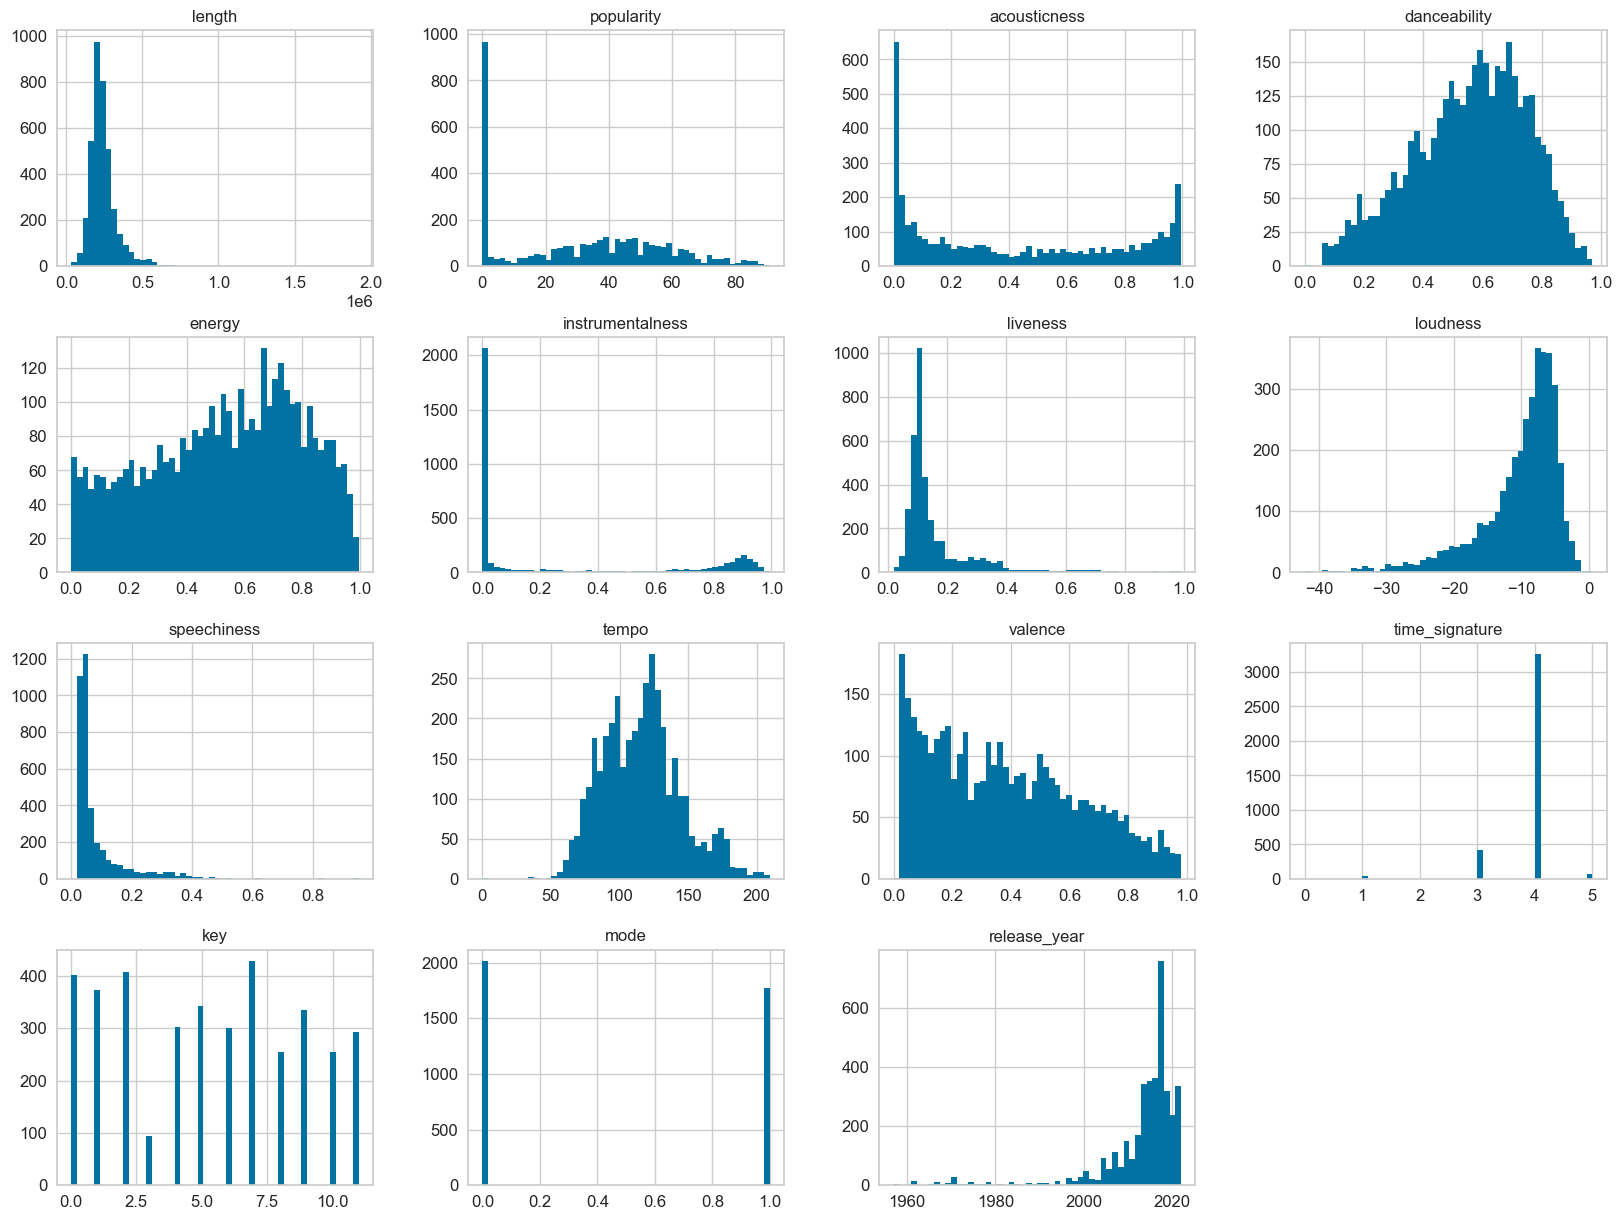

[]

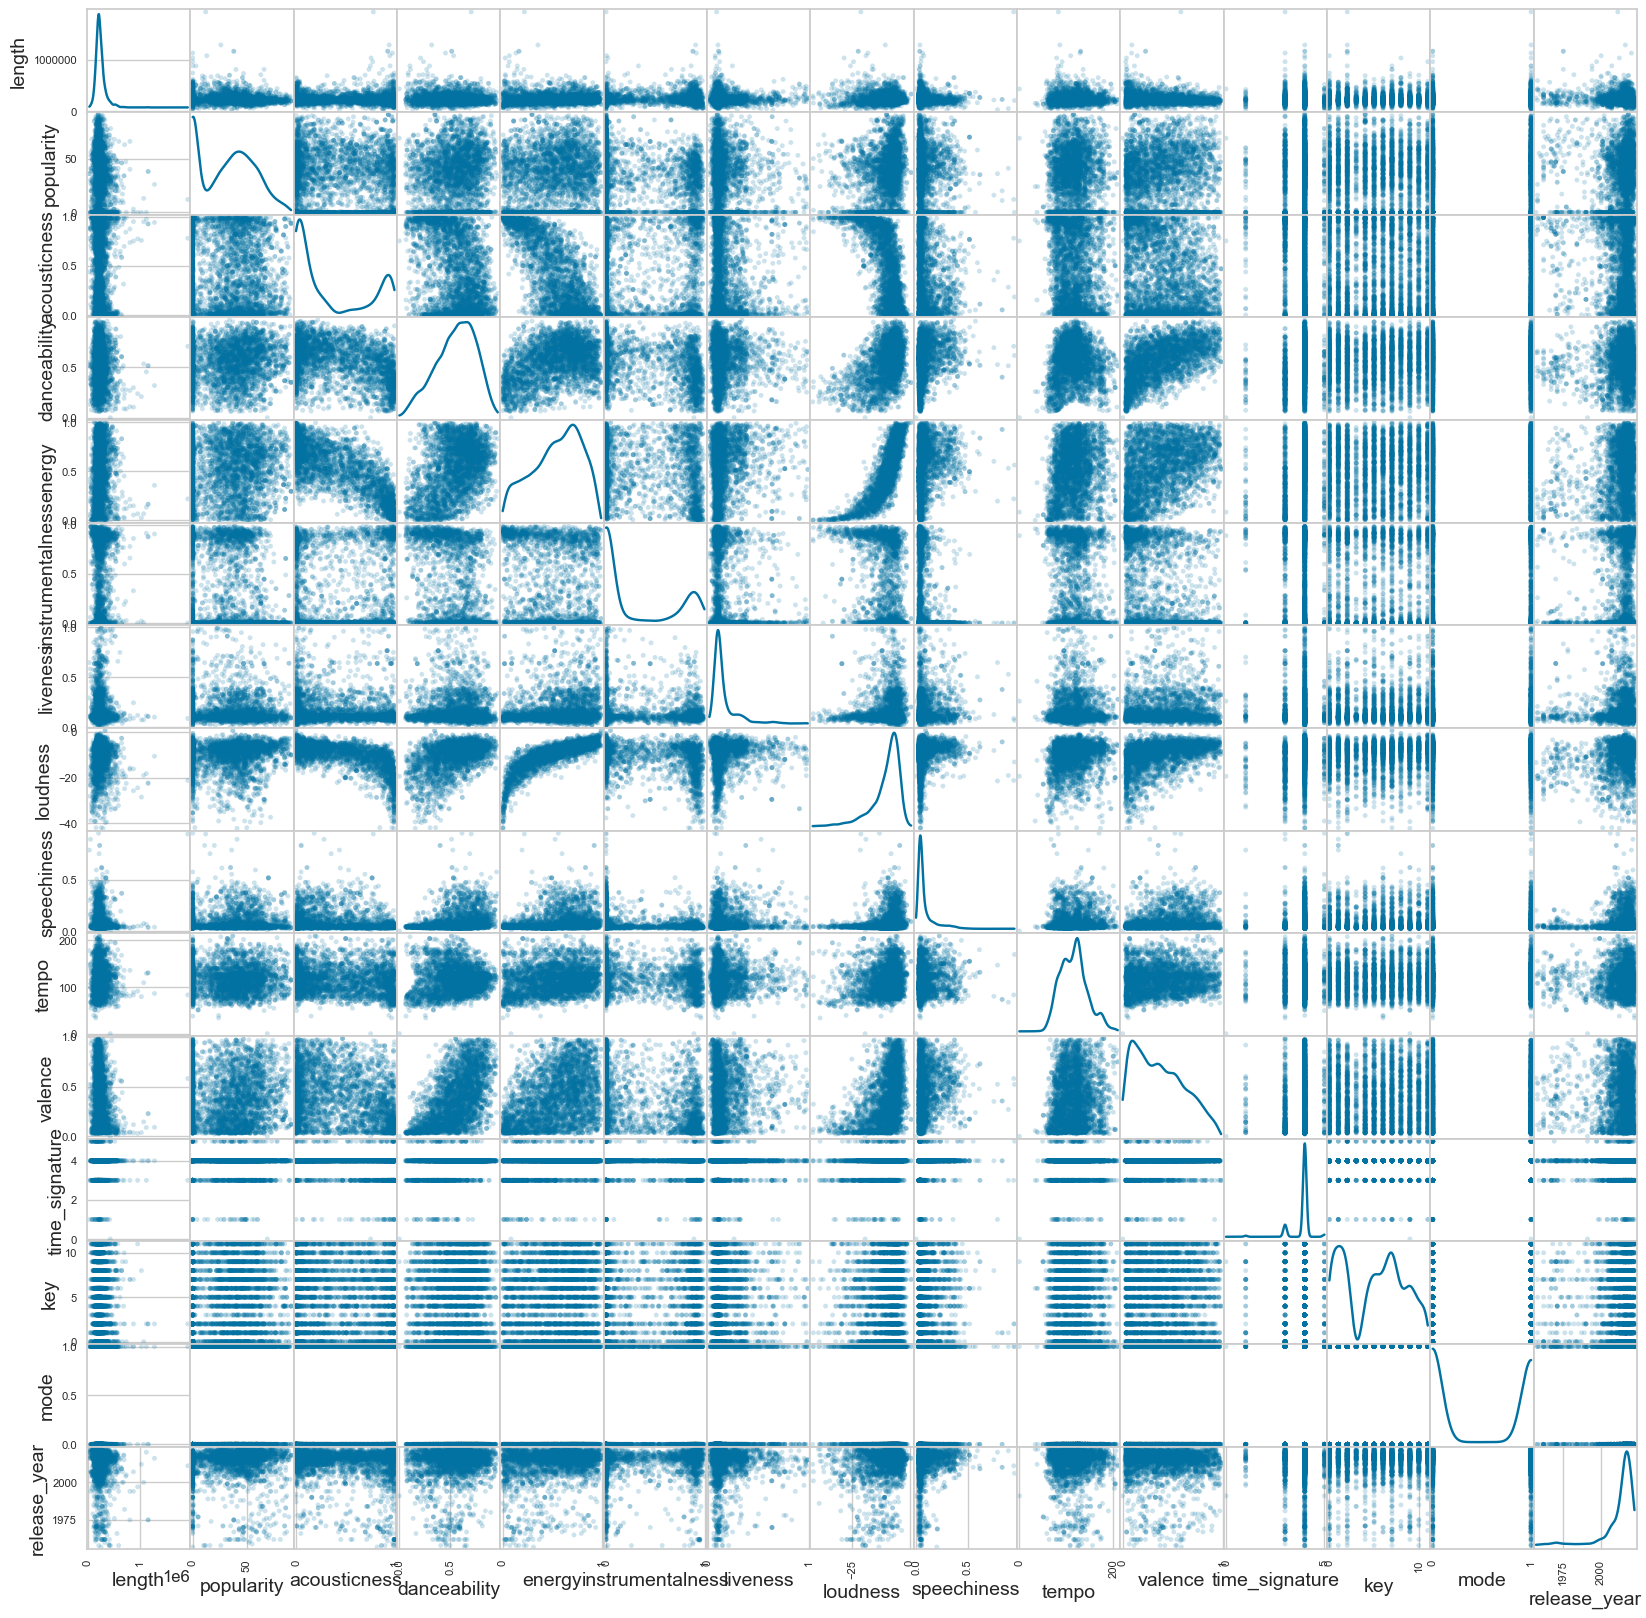

In [88]:
# distribution des données pour chaque variable numérique
df1.hist(bins=50, figsize=(20,15))
plt.show()

# corrélations entre variables
scatter_matrix(df1, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.plot()

Les features "top_year", "key", "time_signature" et "mode" présentent des données males distribuées. Les échelles sont differentes et les variances pour certaines colonnes sont trop élevées, une normalisation est nécesaire.

In [89]:
# Matrice de corrélation
scaler = StandardScaler()
df1_scaler = scaler.fit_transform(df1)

df1_corr = pd.DataFrame(df1_scaler).corr()
df1_corr

0         1         2         3         4         5         6   \
0   1.000000 -0.090781 -0.013060 -0.122396 -0.010190  0.159184 -0.016707   
1  -0.090781  1.000000 -0.025554  0.056566  0.046974 -0.126149 -0.051782   
2  -0.013060 -0.025554  1.000000 -0.380671 -0.796490  0.144663 -0.118025   
3  -0.122396  0.056566 -0.380671  1.000000  0.416164 -0.371841  0.007345   
4  -0.010190  0.046974 -0.796490  0.416164  1.000000 -0.198227  0.164654   
5   0.159184 -0.126149  0.144663 -0.371841 -0.198227  1.000000 -0.095405   
6  -0.016707 -0.051782 -0.118025  0.007345  0.164654 -0.095405  1.000000   
7  -0.055868  0.094007 -0.684073  0.488347  0.825032 -0.400352  0.099420   
8  -0.027003  0.038697 -0.158134  0.250608  0.227177 -0.252279  0.113814   
9   0.005478  0.020710 -0.181875  0.078098  0.202546 -0.027618  0.033895   
10 -0.201114  0.034212 -0.267940  0.571424  0.421524 -0.413900  0.114370   
11 -0.022760 -0.014106 -0.226889  0.247347  0.230867 -0.112612 -0.014503   
12 -0.027023  0.005804 -0.045104  0.026687  0.056795  0.000107  0.006593   
13  0.014894 -0.005636 -0.012184 -0.013689 -0.021717  0.005472  0.002114   
14 -0.122048  0.022677 -0.199386  0.124262  0.209403  0.010786 -0.018577   

          7         8         9         10        11        12        13  \
0  -0.055868 -0.027003  0.005478 -0.201114 -0.022760 -0.027023  0.014894   
1   0.094007  0.038697  0.020710  0.034212 -0.014106  0.005804 -0.005636   
2  -0.684073 -0.158134 -0.181875 -0.267940 -0.226889 -0.045104 -0.012184   
3   0.488347  0.250608  0.078098  0.571424  0.247347  0.026687 -0.013689   
4   0.825032  0.227177  0.202546  0.421524  0.230867  0.056795 -0.021717   
5  -0.400352 -0.252279 -0.027618 -0.413900 -0.112612  0.000107  0.005472   
6   0.099420  0.113814  0.033895  0.114370 -0.014503  0.006593  0.002114   
7   1.000000  0.186656  0.178882  0.428911  0.241378  0.042145 -0.007361   
8   0.186656  1.000000  0.035483  0.251832  0.066477  0.021162 -0.036351   
9   0.178882  0.035483  1.000000  0.085632  0.004341  0.016422 -0.053011   
10  0.428911  0.251832  0.085632  1.000000  0.158673  0.032154 -0.038098   
11  0.241378  0.066477  0.004341  0.158673  1.000000  0.017643  0.012082   
12  0.042145  0.021162  0.016422  0.032154  0.017643  1.000000 -0.141707   
13 -0.007361 -0.036351 -0.053011 -0.038098  0.012082 -0.141707  1.000000   
14  0.234986  0.100239  0.042068 -0.032880  0.068769  0.034507 -0.056753   

          14  
0  -0.122048  
1   0.022677  
2  -0.199386  
3   0.124262  
4   0.209403  
5   0.010786  
6  -0.018577  
7   0.234986  
8   0.100239  
9   0.042068  
10 -0.032880  
11  0.068769  
12  0.034507  
13 -0.056753  
14  1.000000

In [90]:
# Heatmap
df1_corr.style.background_gradient(cmap='coolwarm', axis=None)

## Préparation des données

Préparez vos données afin de pouvoir utiliser des algorithmes d'apprentissage non supervisé (clustering). Ne perdez pas de vue la question métier à laquelle vous cherchez à répondre

## Modélisation et évaluation

<div style="background-color: LightSlateGray;color:white">Modélisation - KMeans</div>

<p>On va présenter deux façons de faire pour déterminer k : soit de façon "manuelle", soit avec une librairie dédiée `KElbowVisualizer`.<br/> On verra que les k optimaux retenus sont différents !</p>

On dispose de 3790 musiques pour réaliser 7 playlists pour chaque utilisateur, soit en moyenne environ 541 par année de top à reconstituer.
Un playlist comptient en moyenne entre 20 et 100 titres. Considerons que nos playlists comptiennent 20 titres
on aura donc 27 individus au maximun donc moins de clusters. 

Nous prenons alors la plage de recherche de k de 1 à 30.

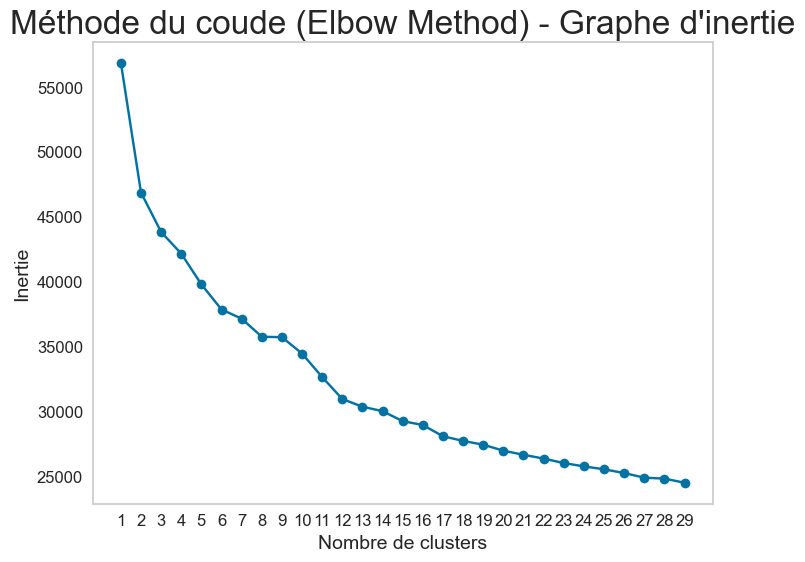

In [91]:
# Algorithme des K-moyennes (KMeans) 
# Choix hyperparamètre k - Méthode 1 (calcul des inerties, tracé de la courbe, choix par l'utilisateur)
# Initialisation du tableau stockant les valeurs de l'inertie (variance intra-classe) pour k donné

inertie=[]


# On teste pour k classes allant de 1 à 30 
#(normalement on commence à 0 mais k=0 n'a pas de sens... donc on va jusqu'à *30 non inclus* !)
for k in range (1,30):
    kmean=KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df1_scaler) #ou 
    inertie.append(kmean.inertia_)

# On trace le coude sur la base des valeurs d'inertie calculées pour k=1..30
plt.figure(figsize=(8, 6))
plt.plot(range(1,30),inertie,'o-')
plt.title("Méthode du coude (Elbow Method) - Graphe d'inertie", fontsize=24)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.xticks(np.arange(1,30,1))
plt.grid()
plt.show()

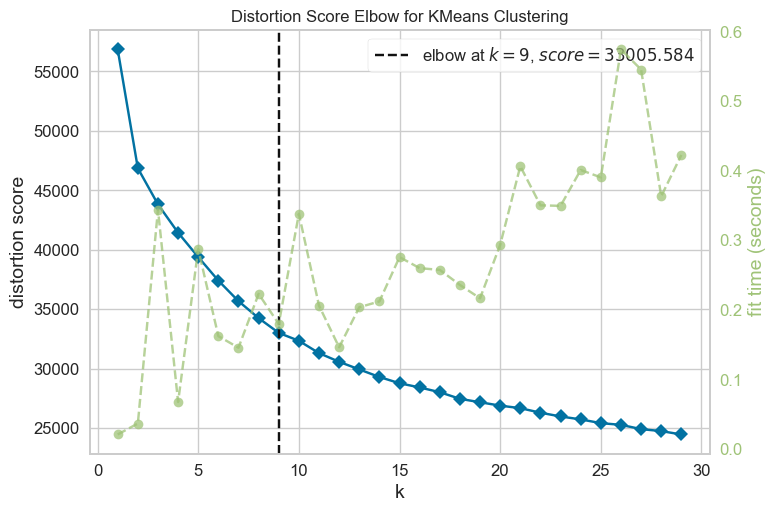

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
# Algorithme des K-moyennes (KMeans) 

# Choix hyperparamètre k - Méthode 2 (KElbowVisualizer) (k allant de 1 à 30)

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,30))

visualizer.fit(df1_scaler)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


On peut imaginer avec les 2 graphes que l'elbow se situe entre k=6 et k=15.

<div style="background-color: CadetBlue;">Entraînement et clustering</div>

<div style="background-color: CadetBlue;">Pour k de 6 à 15</div>

## Modélisation et évaluation


<div style="background-color: LightSlateGray;color:white">Analyse de la performance - KMeans</div>
Nous n'avons pas de données labellisées permettant de comparer les prédictions à la réalité.

On doit donc évaluer la performance à partir du modèle proprement dit. Pour cela on utilise le Coefficient de la Silhouette (Silhouette Score) : plus sa valeur est élevée, plus le modèle définit de bons clusters. 

Ce coefficient (noté `s`) est calculé pour chaque donnée et est composé de deux scores :
* a : distance moyenne entre la donnée et toutes les autres données de son cluster
* b : distance moyenne entre la donnée et toutes les autres données du cluster voisin le plus proche
$$s = \frac{b - a}{max(a, b)}$$

Le score global du modèle appliqué à un jeu de données est la moyenne de tous les scores s pour chaque donnée.


In [93]:
# On cherche le score le plus élevé parmi ceux calculés pour des valeurs différentes de k

best_i = None
best_sscore = float('-inf')  # Initialisé à une valeur très basse

for i in range(6, 16):
    
    cluster_modelk = KMeans(n_clusters=i, random_state=0)
    labels = cluster_modelk.fit_predict(df1_scaler)
    
    # Calculez le score Silhouette moyen
    sscore = metrics.silhouette_score(df1_scaler, labels, metric='euclidean')

    # Imprimez le score Silhouette moyen pour chaque cluster
    print(f"Score Silhouette moyen (distance euclidienne) pour {i} clusters : {sscore}")
    
    # Comparez avec le meilleur score actuel
    if sscore > best_sscore:
        best_sscore = sscore
        best_i = i
        best_labels = cluster_modelk.fit_predict(df1_scaler) #On stock la valeur des labels pour le nombre de clusters avec le meilleur Sscore
        #Ces valeurs seront utilisées par la suite

print(f"Max : {best_sscore} pour k = {best_i} clusters")

Score Silhouette moyen (distance euclidienne) pour 6 clusters : 0.1124156392558448
Score Silhouette moyen (distance euclidienne) pour 7 clusters : 0.11735031709091173
Score Silhouette moyen (distance euclidienne) pour 8 clusters : 0.10650682253367222
Score Silhouette moyen (distance euclidienne) pour 9 clusters : 0.10849296999909938
Score Silhouette moyen (distance euclidienne) pour 10 clusters : 0.1013448964525483
Score Silhouette moyen (distance euclidienne) pour 11 clusters : 0.10926990933495197
Score Silhouette moyen (distance euclidienne) pour 12 clusters : 0.1078692290069503
Score Silhouette moyen (distance euclidienne) pour 13 clusters : 0.101793953446567
Score Silhouette moyen (distance euclidienne) pour 14 clusters : 0.10430738215913336
Score Silhouette moyen (distance euclidienne) pour 15 clusters : 0.10370852098236241
Max : 0.11735031709091173 pour k = 7 clusters


<div style="background-color: LavenderBlush;">Analyse des scores</div>

On a un score `s` moyen meilleur pour k = 7. On retiendra donc 7 clusters. On peut donc considérer que le jeux de données représente les "Top de l'année" pour 7 utilisateurs de Spotify

Un score Silhouette moyen de 0.117 est généralement considéré comme faible

Cela peut s'expliquer par la complexité des Données : Si les données sont intrinsèquement complexes ou si les clusters se chevauchent naturellement, obtenir un score Silhouette élevé peut être difficile.

<div style="background-color: LightSlateGray;color:white"> Hierarchical Clustering</div>


Comparons le Silhouette Score Moyen pour les 2 méthodes (Kmeans et HC) pour choisir une des deux méthodes

In [94]:
# On calcule de les matrice des distances Z1, Z2 et Z3 (1 par nature de distance, respectivement Single, Complete et Ward)
# TBC
y=scipy.spatial.distance.pdist(df1_scaler, metric='euclidean')
Z1=scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
Z2=scipy.cluster.hierarchy.linkage(y, method='complete', metric='euclidean', optimal_ordering=False)
Z3=scipy.cluster.hierarchy.linkage(y, method='ward', metric='euclidean', optimal_ordering=False)

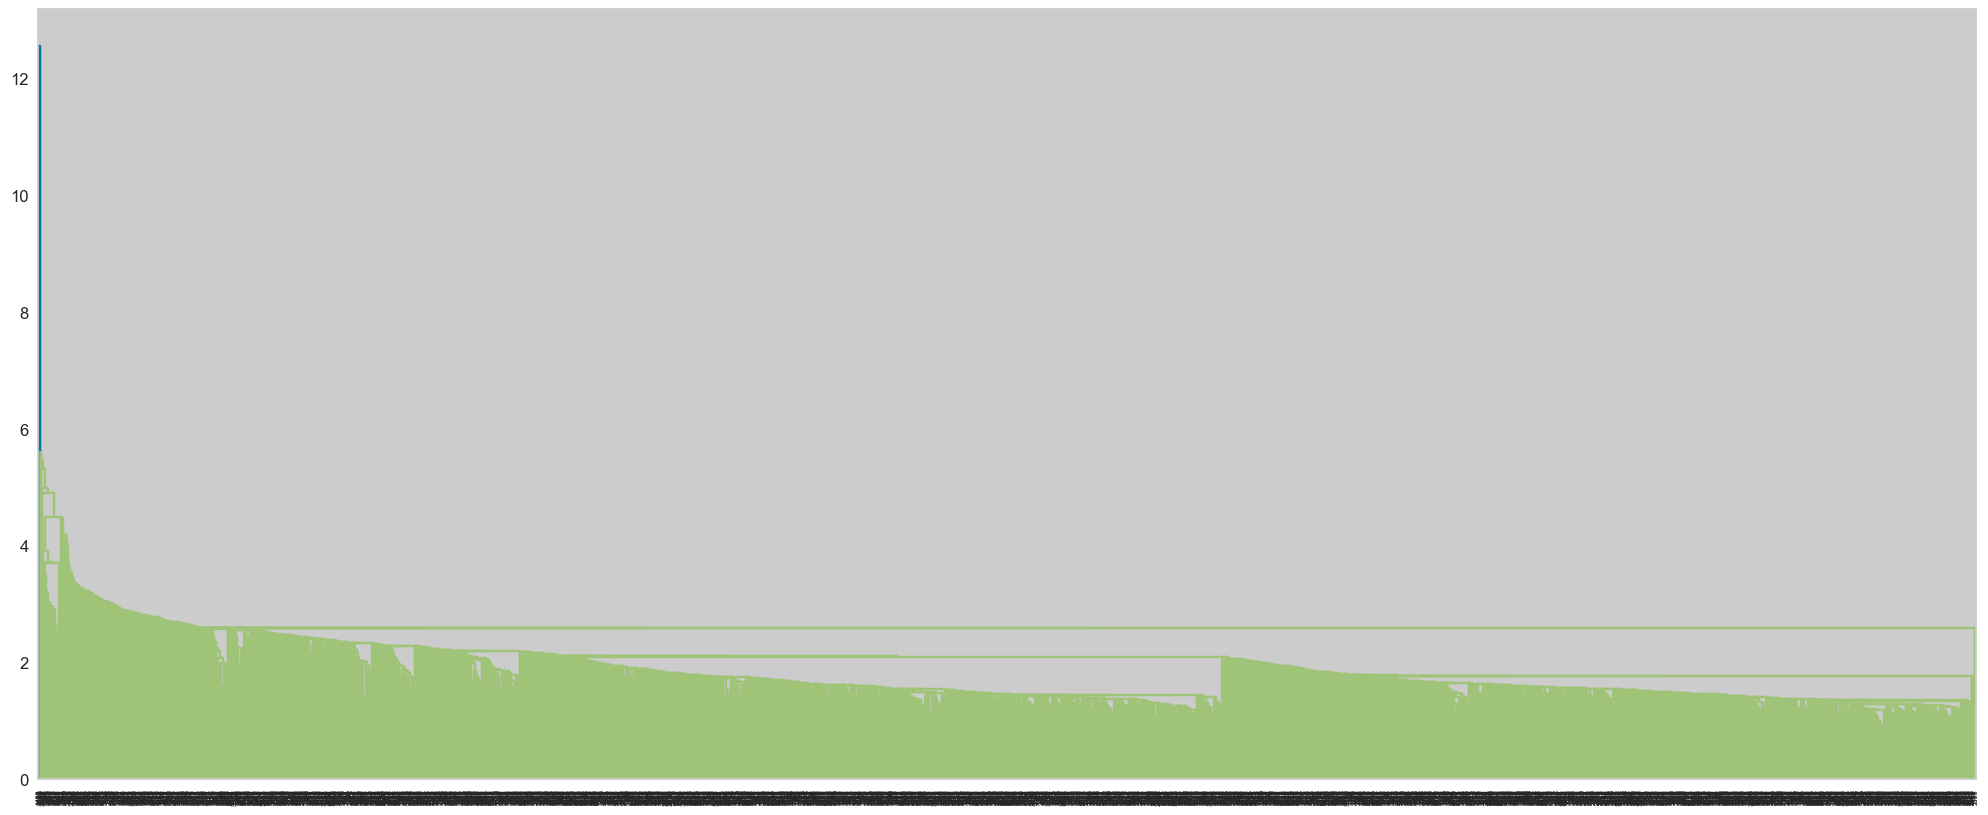

In [95]:
# On affiche le dendrogramme pour chaque modèle
#Single
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z1)
plt.show()

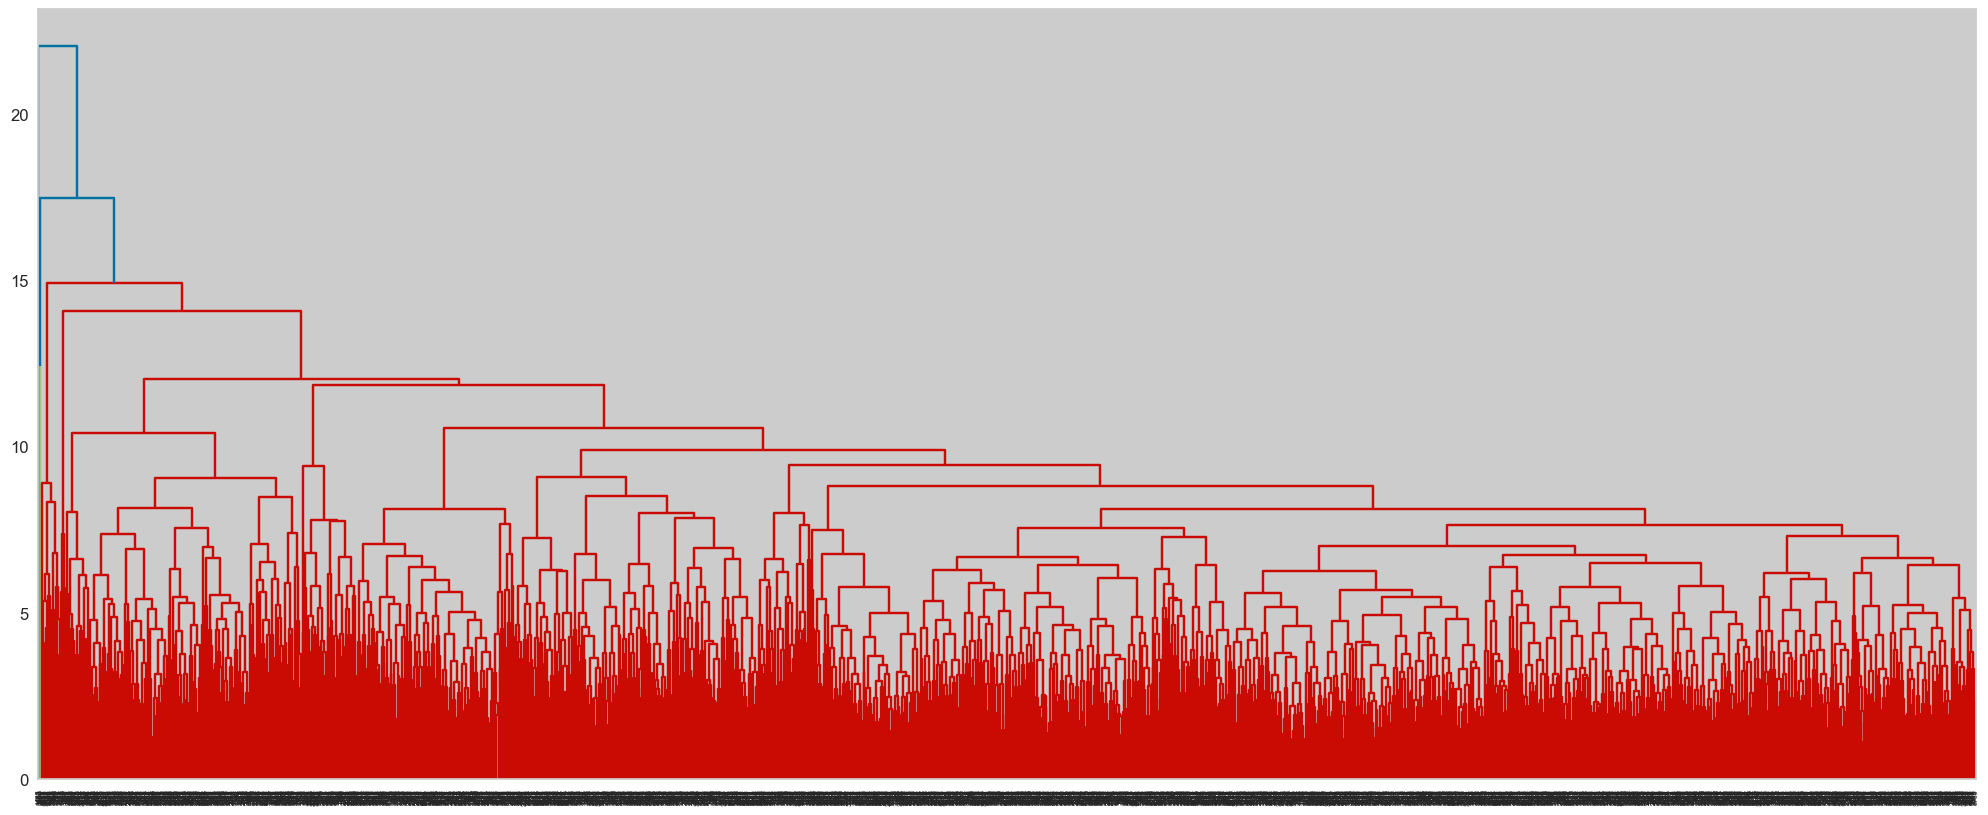

In [96]:
# On affiche le dendrogramme pour chaque modèle
# Complete
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z2)
plt.show()

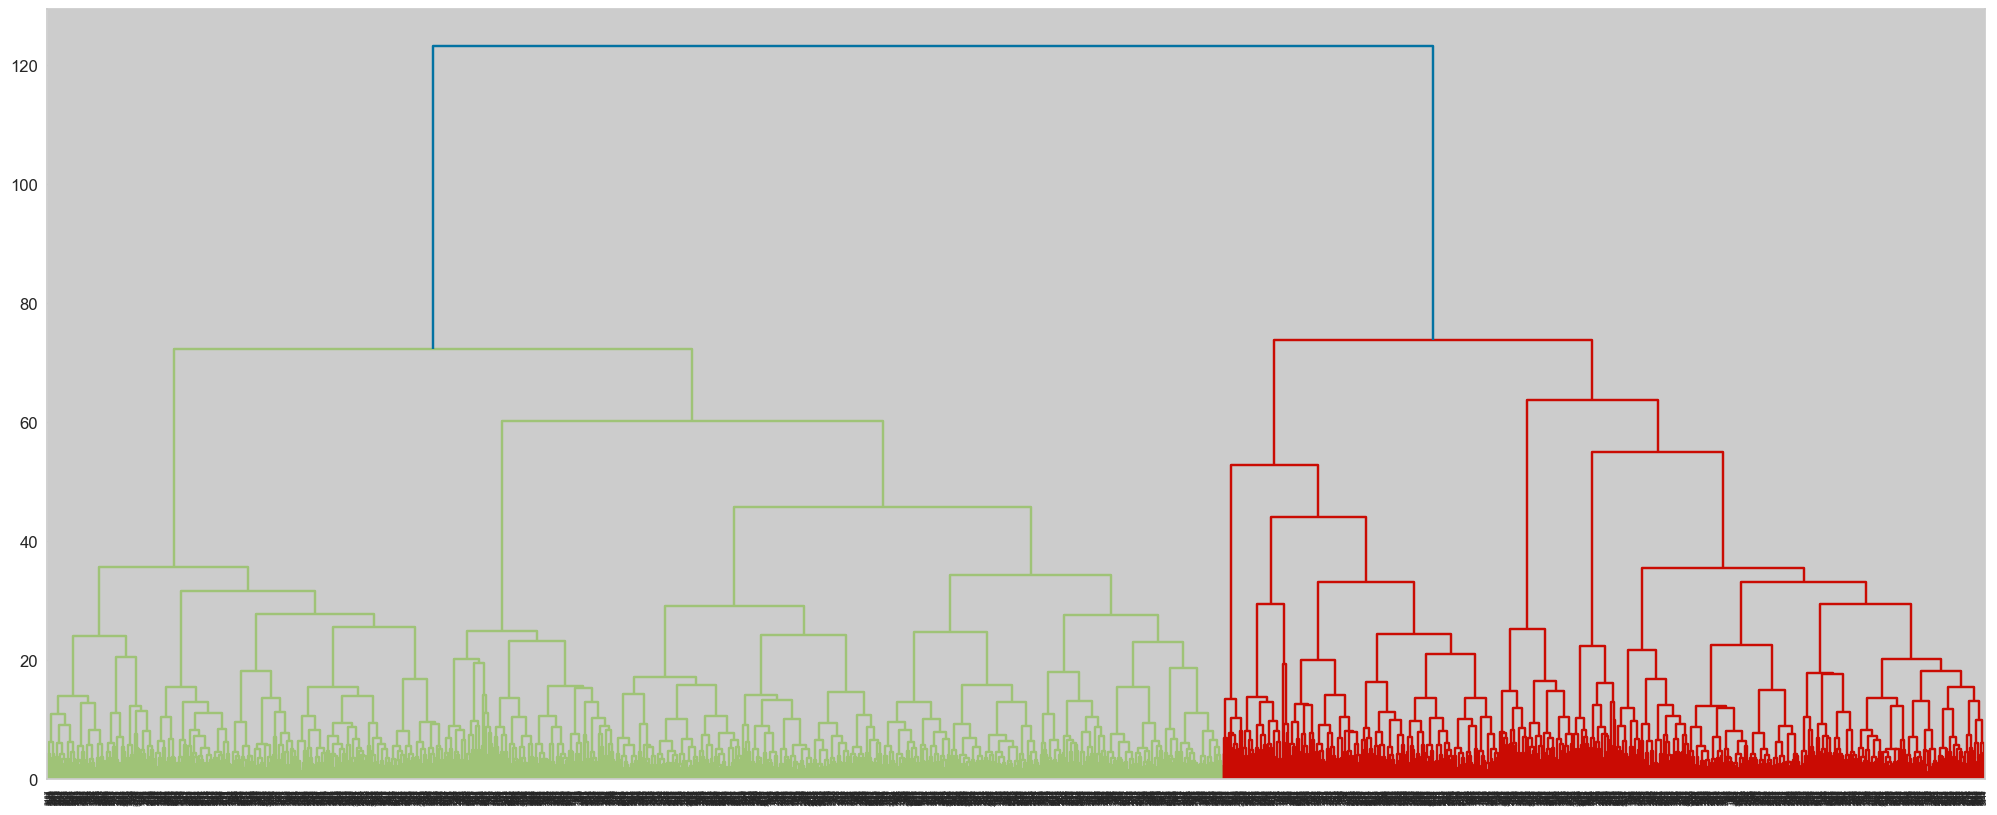

In [97]:
# On affiche le dendrogramme pour chaque modèle
# Ward
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z3)
plt.show()

On trace ensuite l'inertie en fonction du nombre de clusters de chaque modèle

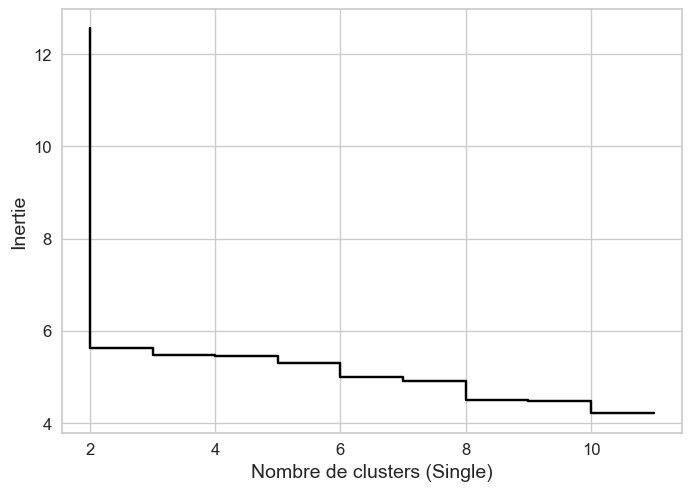

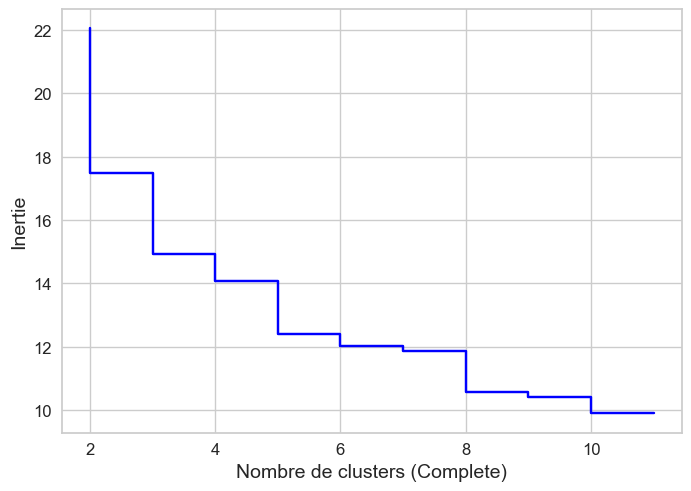

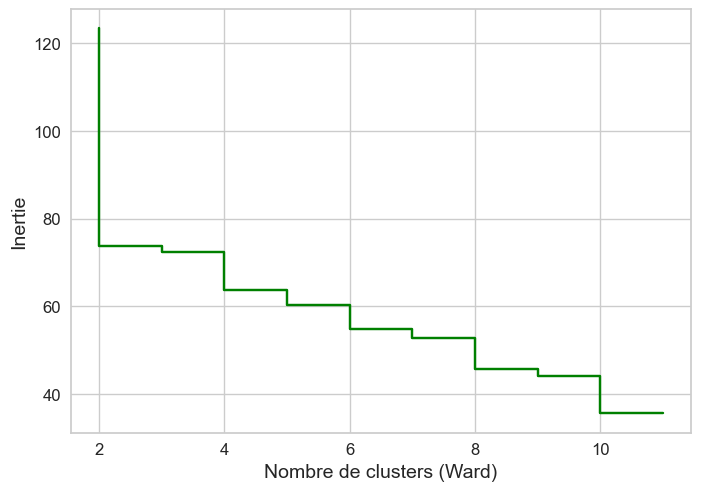

In [98]:
last1 = Z1[-10:, 2]
last1_rev = last1[::-1]
idxs1 = np.arange(2, len(last1) + 2)
plt.step(idxs1, last1_rev, c="black")
plt.xlabel("Nombre de clusters (Single)")
plt.ylabel("Inertie")
plt.show()

last2 = Z2[-10:, 2]
last2_rev = last2[::-1]
idxs2 = np.arange(2, len(last2) + 2)
plt.step(idxs2, last2_rev, c="blue")
plt.xlabel("Nombre de clusters (Complete)")
plt.ylabel("Inertie")
plt.show()

last3 = Z3[-10:, 2]
last3_rev = last3[::-1]
idxs3 = np.arange(2, len(last3) + 2)
plt.step(idxs3, last3_rev, c="green")
plt.xlabel("Nombre de clusters (Ward)")
plt.ylabel("Inertie")
plt.show()


Après visualisation de chacun des clusters formés avec les method "single" et "complete" on remarque un problème. La grande majorité des points se retrouve dans un seul et même cluster ce qui paraît incohérent. On peut aussi confirmer cette observation avec les dendogrames tracés plus haut

In [99]:
#Matrice de liaison
Z = linkage(df1_scaler, method='ward')


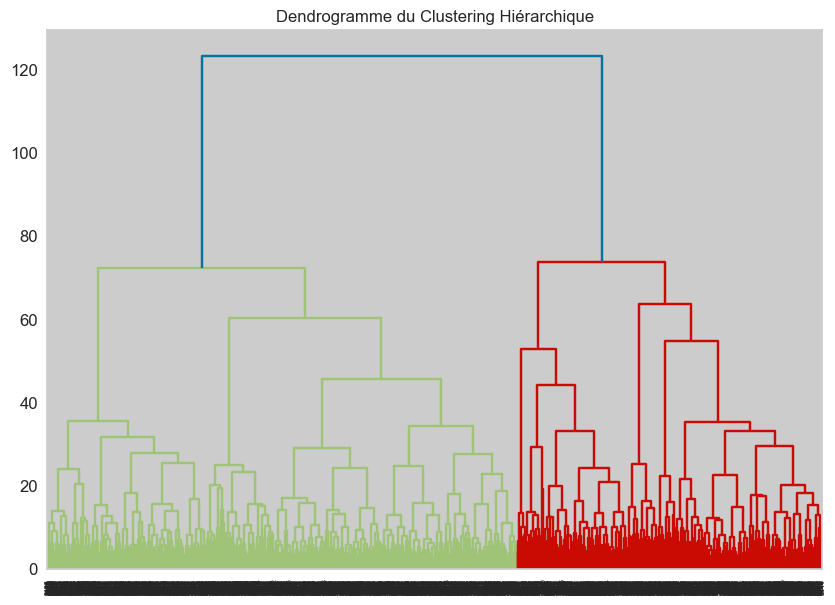

In [100]:
# Création du dendrogramme
plt.figure(figsize=(10, 7))
plt.title("Dendrogramme du Clustering Hiérarchique")
dendrogram(Z)

# Affichage du dendrogramme
plt.show()


In [101]:
# Choix du seuil de distance et formation des clusters
seuil_distance = 47 #Déterminé empiriquement
clusters = fcluster(Z, seuil_distance, criterion='distance')

#Si on veut afficher l'ensemble des clusters formés
#np.set_printoptions(threshold=np.inf)

print(clusters)
average_silhouette_scoretest = silhouette_score(df1_scaler, clusters, metric='euclidean')
print("Le score moyen de la silhouette pour la méthode WARD est :", average_silhouette_scoretest)

[5 3 3 ... 3 1 2]
Le score moyen de la silhouette pour la méthode WARD est : 0.09015008349629303


Le Sscore moyen est donc plus faible qu'avec le kmeans, on retiendra donc ce dernier pour la suite

<div style="background-color: LightSlateGray;color:white">Analyse des clusters</div>

In [102]:
# On ajoute les labels des clusters au df3 pour pouvoir faire l'analyse
# attention, on créé un nouveau DF afin de ne pas écraser l'original
df2 = df.copy()

df1["cluster"] = best_labels
df2["cluster"] = best_labels

In [103]:
#On affiche l'ensemble des musiques dans les tops de chaque utilisateur toutes années confondues
for i in range(best_i):
    print(f'Cluster {i}')
    print(df2[df2.cluster == i] [['name','artist']].values.tolist())
    print()

Cluster 0
[["Mother's Lullaby", 'Sound Adventures'], ['Le Caire', 'Sofiane Pamart'], ['Hearing', 'Sleeping At Last'], ['Hearing', 'Sleeping At Last'], ['Pavane pour une infante défunte in G major, M. 19', 'Khatia Buniatishvili'], ['La Havane', 'Sofiane Pamart'], ['Lament for Thorin', 'Eurielle'], ['A Moment of Bliss', 'Hollywood Burns'], ['Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]', 'Yo-Yo Ma'], ['Underwater Secrets', 'Various Artists'], ['Toccata & Fugue in D Minor, BWV 565 (Transcribed for Piano) - Remastered', 'Johann Sebastian Bach'], ['Beyond the Horizon', 'Olivier Deriviere'], ['Night Club 1960', 'Al Di Meola'], ['Rokudan', 'Satomi Fukami'], ['Le ruban dénoué: I. Décrets indolents du hasard', 'Ludmila Berlinskaya'], ['Borealis', 'Sofiane Pamart'], ['Awake - From "Surface"', 'Ólafur Arnalds'], ['The Arrival of Baby Harry', 'John Williams'], ['Partita for Violin Solo No. 1 in B Minor, BWV 1002: 1. Allemande', 'Johann Sebastian Bach'], ['Prelude, Choral e

In [104]:
#On affiche ce que l'on veut voir pour l'utilisateur n°1
num_cluster = 1
for j in range(min(df['top_year']), max(df['top_year'])+1) :
    print(f'Cluster {num_cluster} - Top year {j}')
    print(df2[(df2['top_year'] == j) & (df2['cluster'] == num_cluster )]['name'].tolist())
    print()
    print('Nombre de musiques dans le top de cette année: ', df2[(df2['top_year'] == j) & (df2['cluster'] == num_cluster)]['name'].count())
    print()

Cluster 1 - Top year 2016
['A Line In The Dirt', 'Yellow Submarine - Remastered 2015', 'Partir', 'Halo', 'Les gens qui doutent', 'Tall Ground - Bonus Track', 'La main verte - Live', 'Amen - Live in Dublin', 'Half Mast', 'Born To Die - Woodkid & The Shoes Remix', 'Into Wonderland', 'Les gens qui doutent', 'Happe - Live 2006', 'Fais-moi la passe (feat. Karim Benzema)', 'My Number', 'Sugar Man', 'The Partisan - Live Oct 10, 2008; Hartwall Arena, Helsinki, Finland', 'The Stojka Empire (feat Harry Stojka & The Cat Empire)', 'Bande à part', 'La Manic - Live at Québec City Show, 2012', 'La Route de nuit - Live 2006', 'Les gens qui doutent', 'Far From Any Road', 'Soul Man - Live', 'Une petite cantate - Live 2006', 'Please - Live at Longwood Gardens, Kennet Square, PA, August 28, 2013', 'Breathing Underwater', 'California Love', 'Night Comes On - Live at Mönchengladbach Show, 2012', 'Jésus est le chemin', 'Two Arms Around You', 'Tubthumping - I get knocked Down', 'Sur la route - Live 2010', 'Wh

Passons maintenant à la prédiction pour savoir à quel utilisateur correspond chaque musique

In [105]:
#Nomarlisation des données de prédiction
scaler = StandardScaler()
df1_predict_scaler = scaler.fit_transform(df1_predict)

#Prédiction des clusters à l'aide de fit_predict
cluster_modelk_predict = KMeans(n_clusters=7, random_state=0)
labels_predict = cluster_modelk_predict.fit_predict(df1_predict_scaler)
#On ajoute une colonne cluster qui indique à quel utilisateur correspond telle musique
df_predict["cluster"] = labels_predict
df_predict

name  \
0              Autumn Leaves   
1            Blues sur Seine   
2        Le jardin des F√©es   
3                   El Ciego   
4                 Jenny Wren   
..                       ...   
95               Sang M√™l√©   
96                    Maryan   
97  Moon Over Bourbon Street   
98           No Woman No Cry   
99              Tadow - Edit   

                                                album              artist  \
0                                          Summerwind     Lars Danielsson   
1                                    Mare Nostrum III         Paolo Fresu   
2                                    Mare Nostrum III         Paolo Fresu   
3                                         P60LO FR3SU         Paolo Fresu   
4                                         Chimichurri  Baptiste Trotignon   
..                                                ...                 ...   
95                                       Face to Face         Eddy Louiss   
96                                             Shleep        Robert Wyatt   
97                      The Dream Of The Blue Turtles               Sting   
98  Harlem-Kingston Express (Live at Dizzy's Club ...     Monty Alexander   
99                                              Tadow              Masego   

   release_date  length  popularity  acousticness  danceability  energy  \
0    28/09/2018  237984          36         0.974         0.370  0.0548   
1    25/01/2019  293609          33         0.988         0.336  0.0275   
2    25/01/2019  312062          27         0.989         0.273  0.1390   
3    10/02/2021  341391           3         0.956         0.579  0.2940   
4    23/09/2016  234986          32         0.851         0.421  0.2020   
..          ...     ...         ...           ...           ...     ...   
95   06/11/2001  305840           7         0.871         0.619  0.4620   
96         1997  371093          26         0.798         0.479  0.3220   
97   01/01/1985  240306          50         0.670         0.413  0.0563   
98   14/06/2011  426053          31         0.683         0.536  0.4340   
99   27/07/2020  214880          39         0.693         0.542  0.5430   

    instrumentalness  ...  speechiness    tempo  valence  time_signature  key  \
0           0.112000  ...       0.0385   65.250   0.3760               4    7   
1           0.648000  ...       0.0422   76.567   0.2660               3    9   
2           0.926000  ...       0.0368  132.169   0.1030               3    9   
3           0.494000  ...       0.0700  105.913   0.4850               4    2   
4           0.948000  ...       0.0399   97.266   0.3240               4    5   
..               ...  ...          ...      ...      ...             ...  ...   
95          0.567000  ...       0.0532  108.602   0.6480               3    5   
96          0.374000  ...       0.0295  115.140   0.0943               1    2   
97          0.000126  ...       0.0410  124.977   0.1830               4    5   
98          0.926000  ...       0.0353   87.011   0.3650               4    0   
99          0.000044  ...       0.1320  121.356   0.3460               4    9   

    mode                                   uri  release_year  top_year  \
0      0  spotify:track:5rXJ6iWGWLEOBHGtdBvDlV          2018      2022   
1      0  spotify:track:2mEsVtCXgm4NbnIiRC3sdK          2019      2022   
2      0  spotify:track:3mvDItSAf5SeniJ1hdJf8w          2019      2022   
3      0  spotify:track:5Mfrusx5JOup56lSbJl5gq          2021      2022   
4      0  spotify:track:1Kf83SdGMMFnoPj6oQbLN3          2016      2022   
..   ...                                   ...           ...       ...   
95     0  spotify:track:5x2JOUmS1Xcn2du5LziV5E          2001      2022   
96     1  spotify:track:4epAz872eTEixF8kEnTTS2          1997      2022   
97     0  spotify:track:3KF1EXX2zGfVtGeZKiClB0          1985      2022   
98     1  spotify:track:5RdShEqRmAFgiCwplAWS81          2011      2022   
99     0  spotify:track:5R

In [106]:
#On affiche l'ensemble des musiques dans les tops de chaque utilisateur toutes années confondues
for j in range(min(df_predict['cluster']), max(df_predict['cluster'])+1) :
    print(f'Cluster {j}')
    print(df_predict[ (df_predict['cluster'] == j)]['name'].tolist())
    print()

Cluster 0
['Jenny Wren', 'Neige', 'Annobon', 'Passacaglia', 'For J√≥hann', "Plaisir D'Amour", '13 Pieces for Piano, Op. 76: II. Etude', 'Disse Algu√©m (All Of Me)', 'The Girl From Ipanema', 'Como Siento Yo', 'Sweet & Slow', 'Autumn Leaves', 'Les valseuses', 'Movements Of A Visionary - Remastered 2018', 'Orph√©e & Eurydice: M√©lodie - Arranged by Charl du Plessis', 'Egyptian Fantasy', 'Canto De Ossanha', 'Cry Me A River', 'Moon Over Bourbon Street']

Cluster 1
['El Ciego', 'Tristezas De Um Viol√£o - 2003 Remaster', 'Grauer Beton - Lambert Rework', 'Concussion - Live', 'Mountain King Cha Cha', 'Sea, Sex And Sun - Remix', 'All Night', 'Bim Bom', 'Riders on the Storm', 'Ningu√©m, Ningu√©m', 'Tour de France (Etape 1) - 2009 Remaster', 'A Single Spark', 'Joy', "Why Can't We Live Together", 'Bol√©ro', 'Le sud', '√âternelle - Version Lieu Unique', 'Rose rouge', 'Mannix - From "Mannix" Soundtrack', 'River Man', 'Sang M√™l√©', 'Tadow - Edit']

Cluster 2
['Autumn Leaves', 'Blues sur Seine', 'Le j

In [107]:
#On affiche ce que l'on veut voir pour chaque utilisateur 
for k in range(max(df_predict['cluster'])-min(df_predict['cluster'])-1):
    print(f'Cluster {k} - Top year {j}')
    print(df_predict[(df_predict[' top_year'] == 2022) & (df_predict['cluster'] == k)]['name'].tolist())
    print()
    print(f"Nombre de musiques dans le top de l'année 2022 pour l'utilisateur {k+1}: ", df_predict[(df_predict[' top_year'] == 2022) & (df_predict['cluster'] == k)]['name'].count())
    print()

Cluster 0 - Top year 6
['Jenny Wren', 'Neige', 'Annobon', 'Passacaglia', 'For J√≥hann', "Plaisir D'Amour", '13 Pieces for Piano, Op. 76: II. Etude', 'Disse Algu√©m (All Of Me)', 'The Girl From Ipanema', 'Como Siento Yo', 'Sweet & Slow', 'Autumn Leaves', 'Les valseuses', 'Movements Of A Visionary - Remastered 2018', 'Orph√©e & Eurydice: M√©lodie - Arranged by Charl du Plessis', 'Egyptian Fantasy', 'Canto De Ossanha', 'Cry Me A River', 'Moon Over Bourbon Street']

Nombre de musiques dans le top de l'année 2022 pour l'utilisateur 1:  19

Cluster 1 - Top year 6
['El Ciego', 'Tristezas De Um Viol√£o - 2003 Remaster', 'Grauer Beton - Lambert Rework', 'Concussion - Live', 'Mountain King Cha Cha', 'Sea, Sex And Sun - Remix', 'All Night', 'Bim Bom', 'Riders on the Storm', 'Ningu√©m, Ningu√©m', 'Tour de France (Etape 1) - 2009 Remaster', 'A Single Spark', 'Joy', "Why Can't We Live Together", 'Bol√©ro', 'Le sud', '√âternelle - Version Lieu Unique', 'Rose rouge', 'Mannix - From "Mannix" Soundtrack

In [108]:
# Création d'un dictionnaire pour stocker les nouvelles DataFrames
nouvelles_dataframes = {}

# Boucle sur les valeurs de 0 à 8
for valeur in range(0, best_i + 1):
    # Sélectionnez les lignes correspondant à la valeur actuelle
    nouvelle_dataframe = df2[df2['cluster'] == valeur].copy()
    
    # Stockage dans la nouvelle DataFrame dans le dictionnaire
    nouvelles_dataframes[valeur] = nouvelle_dataframe
# On affiche par exemple, la dataFrame correspondant au cluster4
nouvelles_dataframes[4]


name                        album  \
14                            Lost                         Lost   
20                          Swisha                     Classics   
21              Ghost in The Shell        Ghost in the Shell LP   
27    Free Tibet - Vini Vici Remix                   Free Tibet   
29                    Fallen Haven       The Age of the Saucers   
...                            ...                          ...   
3760                      Ignorant                  Persistence   
3761                          Iris                        Ambre   
3775           Destination Tortuga  Set Sail for the Golden Age   
3776                 Solar Detroit                Solar Sampler   
3788                   Cyber Party              Distant Reality   

                 artist release_date  length  popularity  acousticness  \
14                PYLOT   2019-03-04  318000          39      0.065900   
20              Ratatat   2006-08-22  229773           0      0.158000   
21          Magnus Deus   2018-11-05  558551          24      0.035300   
27        Hilight Tribe   2016-02-15  474782          64      0.013200   
29      Hollywood Burns   2021-11-12  255447          15      0.000339   
...                 ...          ...     ...         ...           ...   
3760      WHIPPED CREAM   2017-09-19  183429          37      0.443000   
3761               Fūji   2021-04-30  316288          16      0.094000   
3775  Antti Martikainen   2016-01-22  344264          37      0.002780   
3776         Maceo Plex   2015-08-14  536534          24      0.000214   
3788           Shirobon   2014-02-04  166779           0      0.002380   

      danceability  energy  instrumentalness  ...  speechiness    tempo  \
14           0.490   0.800            0.0457  ...       0.0473  179.967   
20           0.442   0.533            0.8990  ...       0.0352   95.053   
21           0.651   0.472            0.9060  ...       0.0296  109.984   
27           0.382   0.947            0.6980  ...       0.0662  103.495   
29           0.330   0.820            0.9230  ...       0.0333  169.936   
...            ...     ...               ...  ...          ...      ...   
3760         0.482   0.360            0.6290  ...       0.0675  180.131   
3761         0.369   0.503            0.9060  ...       0.0601   81.987   
3775         0.391   0.719            0.4030  ...       0.0485  150.018   
3776         0.715   0.733            0.8630  ...       0.0553  121.003   
3788         0.722   0.895            0.7340  ...       0.0353  117.974   

      valence  time_signature  key  mode  \
14     0.3140               4    8     0   
20     0.1160               4   11     0   
21     0.0574               4    8     1   
27     0.0728               3    1     1   
29     0.2590               4    4     1   
...       ...             ...  ...   ...   
3760   0.0286               4    9     1   
3761   0.0766               4   11     0   
3775   0.3020               4    5     1   
3776   0.0242               4    8     1   
3788   0.4420               4    1     1   

                                       uri  release_year top_year  cluster  
14    spotify:track:00oSI5KQpdIvi1gxuMPF1D          2019     2021        4  
20    spotify:track:6tB7yLLaEdIQfAk3uY0CS3          2006     2016        4  
21    spotify:track:4yN2VARIr9pHjmBaoMdQ9X          2018     2021        4  
27    spotify:track:2wy29RBixBECDOsXuBs7md          2016     2017        4  
29    spotify:track:7jiueQH7inWjBAYOhJjyTe          2021     2022        4  
...                                    ...           ...      ...      ...  
3760  spotify:track:51Ewo6PHmCgt17vHxSUOIi          2017     2020        4  
3761  spotify:track:6DcLEFxQjPE7r9ep0U5agE          2021     2021        4  
3775  spotify:track:4pQ2v3y8h3l19Ok7VI7upb          2016     2019        4  
3776  spotify:track:5irjZfaPWlYVTnvbfIOUqE          2015     2017        4  
3788  spotify:track:5wszrErn3CKFkARtskv5V2          2014   

L'objectif: Faire la moyenne des caractéristiques des musiques pour chaque utilisateur pour identifier un pattern

In [109]:
# Création d'un dictionnaire pour stocker les moyennes
moyennes_par_valeur = {}

# Boucle sur les valeurs de 0 à 8
for valeur in range(0, best_i):
    # Sélection des lignes correspondant à la valeur actuelle
    nouvelle_dataframe = df1[df1['cluster'] == valeur].copy()
    
    # Calcul des moyennes pour chaque colonne
    moyennes_colonnes = nouvelle_dataframe.mean()
    
    # Stock des moyennes dans le dictionnaire
    moyennes_par_valeur[valeur] = moyennes_colonnes
    
    # Convertion de la Series en DataFrame
    moyennes_dataframe = pd.DataFrame(moyennes_par_valeur)
moyennes_dataframe

0              1              2              3  \
length            247168.442149  251025.948276  282604.964286  228105.002933   
popularity            27.950413      22.620690      37.678571      36.363636   
acousticness           0.896209       0.319262       0.628630       0.293265   
danceability           0.290895       0.550328       0.481196       0.671088   
energy                 0.143022       0.631435       0.342257       0.656525   
instrumentalness       0.777052       0.196039       0.212217       0.040056   
liveness               0.125956       0.661362       0.148297       0.175394   
loudness             -21.342145      -8.993954     -14.678440      -7.480208   
speechiness            0.044260       0.098101       0.050673       0.328745   
tempo                100.831983     119.351057     113.414821     118.522217   
valence                0.127200       0.464585       0.400010       0.551948   
time_signature         3.497934       3.856322       3.797619       3.985337   
key                    4.915289       5.114943       4.696429       5.636364   
mode                   0.491736       0.471264       0.488095       0.398827   
release_year        2012.357438    2012.431034    1974.261905    2015.730205   
cluster                0.000000       1.000000       2.000000       3.000000   

                              4              5              6  
length            292502.366322  218615.558452  225563.665786  
popularity            26.614476      37.819176      30.122853  
acousticness           0.131865       0.200812       0.733957  
danceability           0.506822       0.684149       0.537824  
energy                 0.688127       0.698276       0.327681  
instrumentalness       0.685033       0.066765       0.124064  
liveness               0.142614       0.154258       0.119973  
loudness              -8.205369      -6.378881     -11.773365  
speechiness            0.056056       0.074652       0.052460  
tempo                125.818993     117.891447     112.812631  
valence                0.216797       0.568240       0.317421  
time_signature         3.936484       3.964676       3.900925  
key                    5.511078       5.408747       5.118890  
mode                   0.485968       0.451640       0.487450  
release_year        2016.144756    2015.150547    2014.112285  
cluster                4.000000       5.000000       6.000000

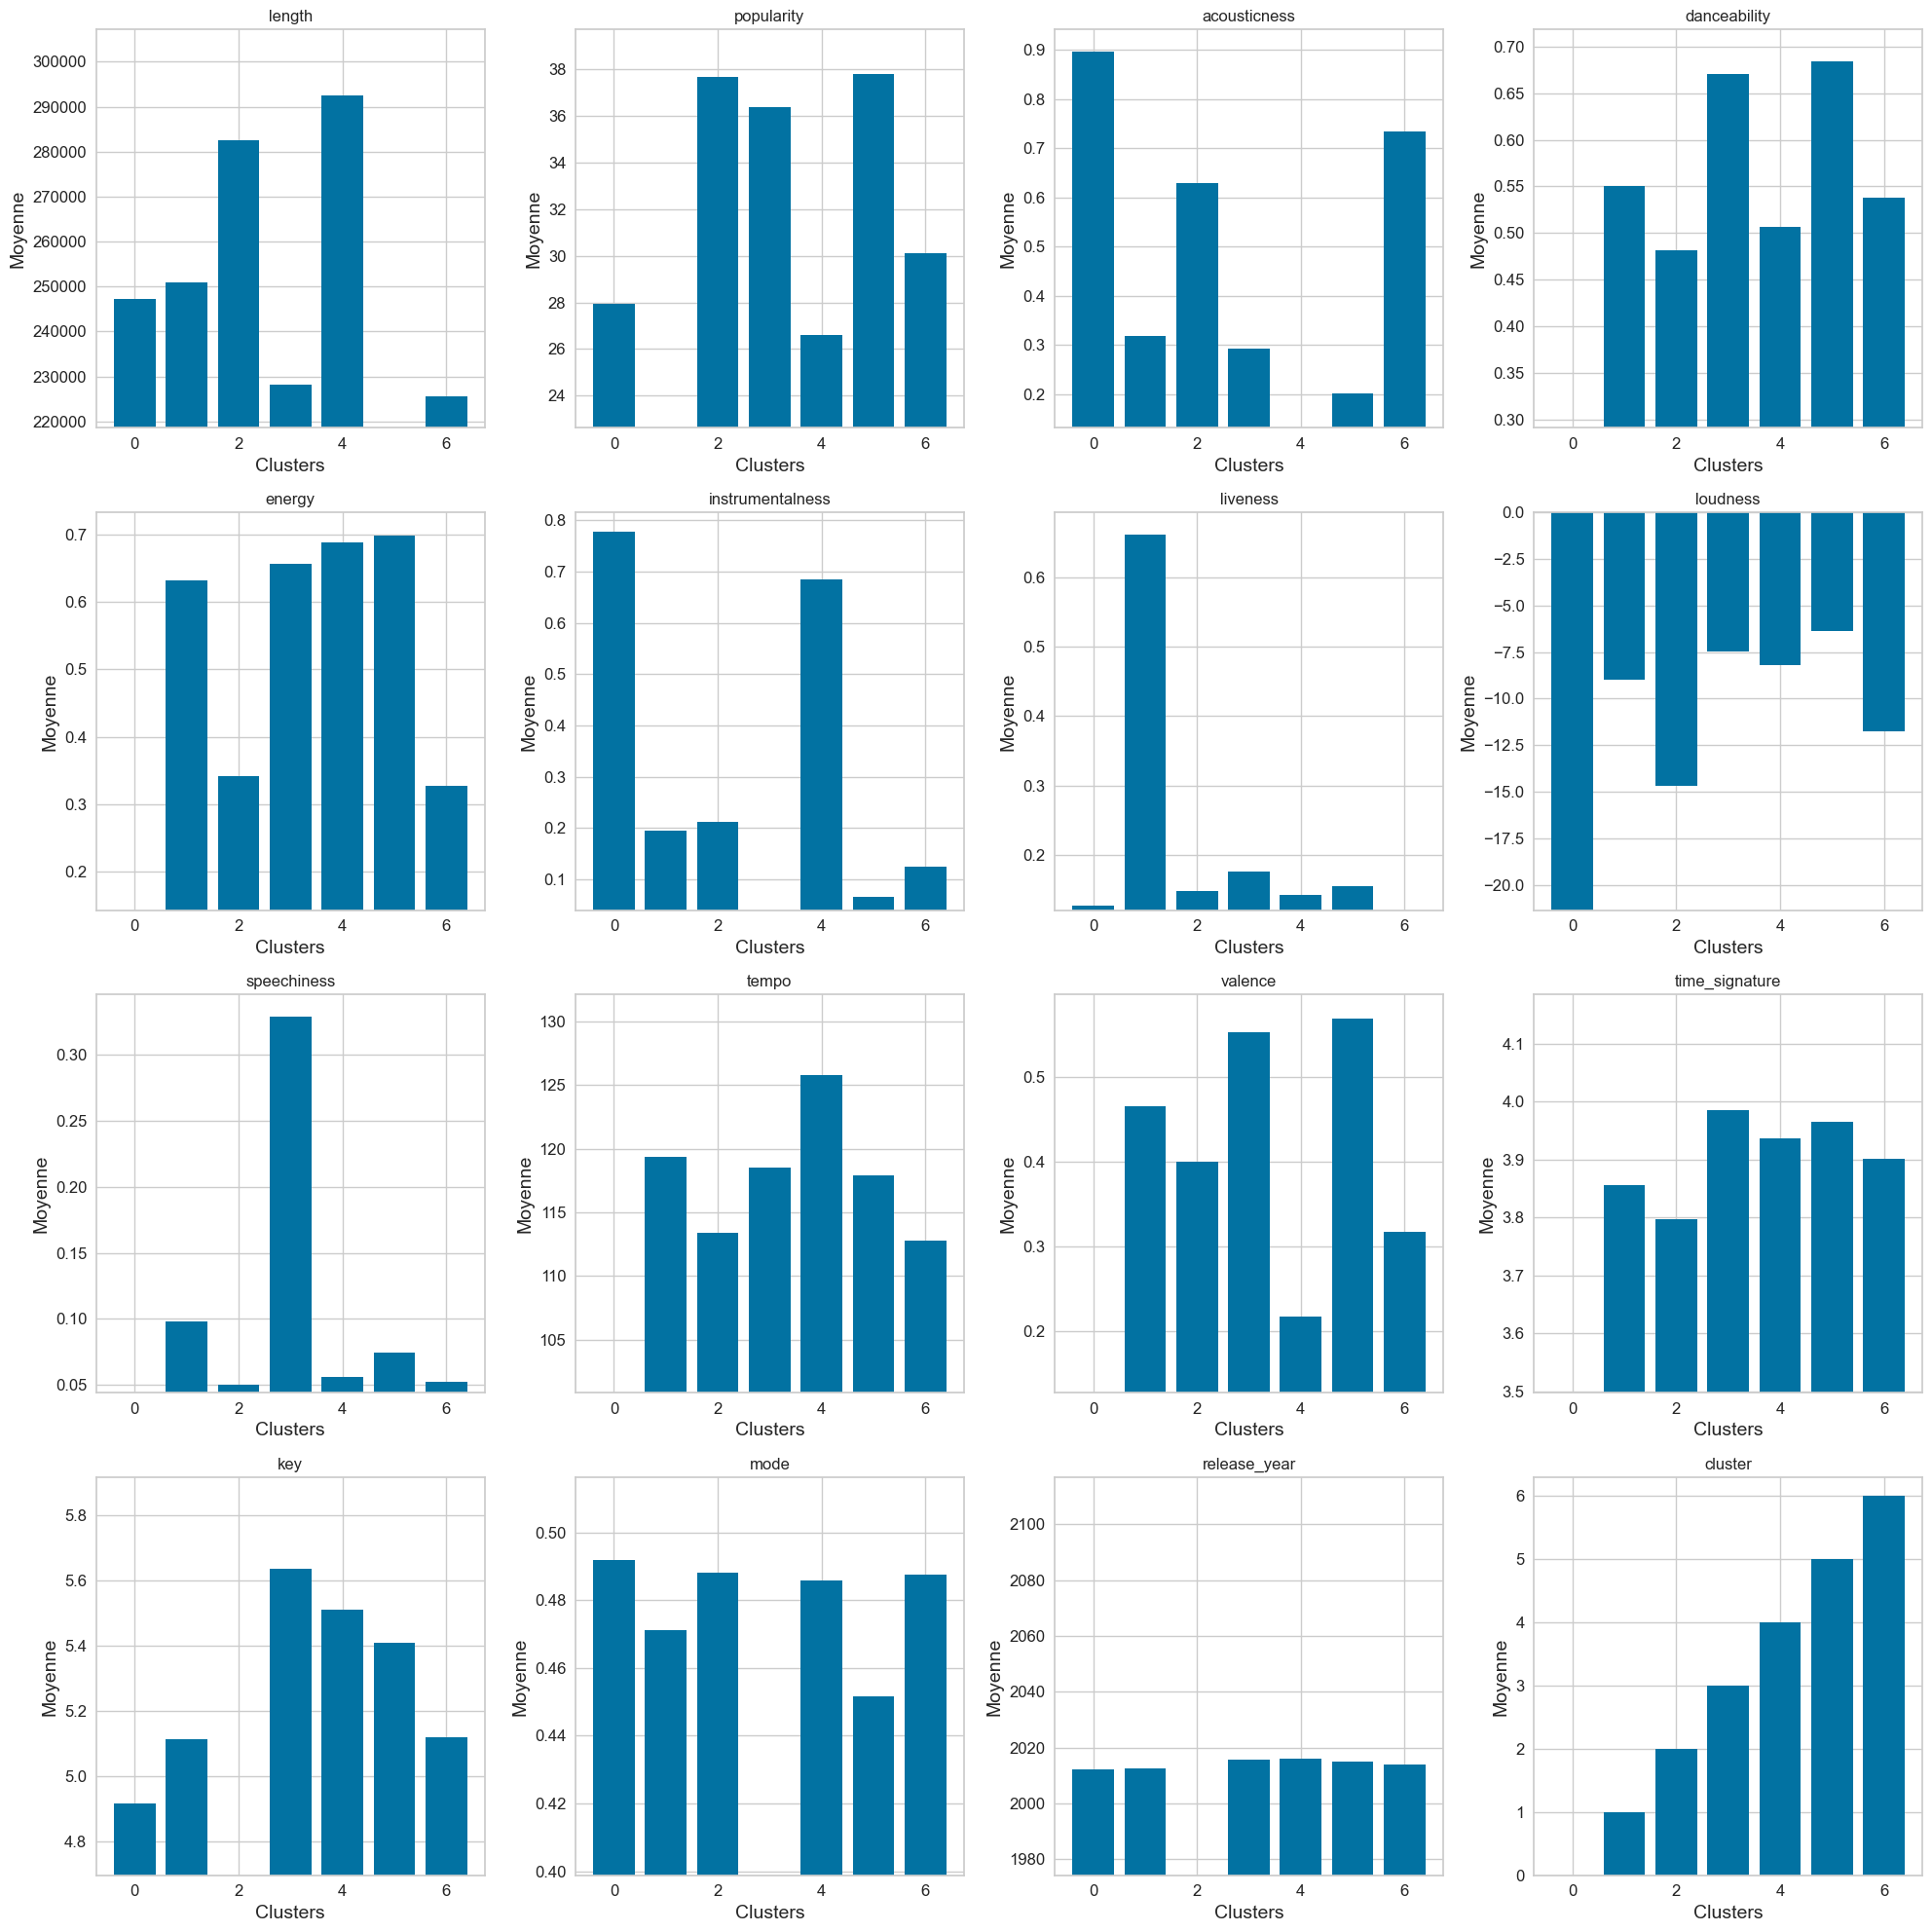

In [110]:
nb_rows = 16

# Créer une figure et des axes pour les subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Ajustez figsize si nécessaire

# Aplatir le tableau des axes pour une itération facile
axes = axes.flatten()

# Parcourir chaque ligne du DataFrame
for i in range(nb_rows):
    min_val = moyennes_dataframe.iloc[i, :].min()  # Valeur minimale de la ligne
    axes[i].bar(moyennes_dataframe.columns, moyennes_dataframe.iloc[i, :])
    axes[i].set_title(f"{moyennes_dataframe.index[i]}")
    axes[i].set_ylabel('Moyenne')
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylim([min_val, None])  # Définir la limite inférieure comme la valeur minimale de la ligne

    


# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

- Le Cluster 0 (utilisateur 1) semble regrouper des morceaux calmes, instrumentaux, et acoustiques, avec un tempo lent et une valence faible. Ces caractéristiques suggèrent des genres tels que la musique classique douce, le jazz ambiant, ou peut-être des morceaux acoustiques folkloriques. La faible popularité indique que ces morceaux pourraient être de niche ou moins connus du grand public.


- Cluster 1 (utilisateur 2) Cette combinaison de caractéristiques pourrait indiquer des genres tels que le rock indépendant, le folk moderne, ou des genres expérimentaux où les performances live et les éléments vocaux jouent un rôle clé, tout en intégrant des éléments électroniques ou amplifiés.


- Le Cluster 2 (utilisateur 3) semble regrouper des morceaux de durée relativement longue et de grande popularité, ce qui pourrait les associer à des genres mainstream ou à des artistes bien établis. La combinaison d'une acousticité élevée et d'une énergie faible suggère une prédominance de morceaux calmes et peut-être mélodiques, possiblement dans des genres tels que la pop acoustique, le soft rock, ou le folk. Malgré une danceabilité et un tempo dans la moyenne basse, ces morceaux maintiennent un certain degré de musicalité et de rythme. La faible présence de liveness et de speechiness indique des enregistrements en studio avec peu de paroles parlées. Enfin, la valence et la signature rythmique dans la moyenne, combinées à une clé très faible, pourraient signaler une variété dans l'humeur et la structure musicale, allant de légèrement mélancolique à modérément joyeuse, sans pencher vers des extrêmes émotionnels.


- Le Cluster 3(utilisateur 4) regroupe des morceaux très courts et populaires, avec une forte présence de paroles, typiques des genres rap ou hip-hop. Ces morceaux sont rythmés et énergiques, suggérant un attrait pour la pop, le dance ou l'électro-pop, caractérisés par une valence joyeuse et des structures musicales complexes.


- Le Cluster 4 (utilisateur 5) regroupe des morceaux longs avec une faible popularité, suggérant des œuvres de niche ou expérimentales. Ils sont caractérisés par une acousticité très faible, une énergie très élevée, et une forte instrumentalité, ce qui indique des compositions principalement instrumentales, dynamiques et probablement électroniques ou rock. Le faible niveau de liveness, de speechiness, et de valence, combiné avec un tempo élevé, suggère une tendance vers des morceaux intenses et rapides, mais moins joyeux ou engageants sur le plan émotionnel.

- Le Cluster 5 (utilisateur 6) contient des morceaux très courts, extrêmement populaires, avec une acousticité très faible et une forte danceabilité, énergie et valence. Ces caractéristiques suggèrent des morceaux dynamiques et entraînants, typiques de la pop moderne, de la musique dance ou de l'électro, conçus pour être accrocheurs et immédiatement engageants. La faible présence d'instrumentalité et de liveness, avec un tempo et une clé élevés, renforce l'idée de morceaux énergiques et optimistes, possiblement avec des éléments électroniques marqués et des mélodies accrocheuses.s
- Le Cluster 6 (utilisateur 7) semble regrouper des morceaux de durée courte à moyenne, avec une popularité modérée. Ces morceaux se caractérisent par une acousticité élevée et une danceabilité élevée, mais une énergie faible, ce qui suggère des chansons mélodiques et agréables à danser tout en étant calmes ou douces, possiblement dans des genres comme le folk moderne ou la pop acoustique. Le faible niveau de liveness et de speechiness, ainsi qu'une valence, un tempo, une clé et un mode modérés, indiquent un équilibre entre les éléments joyeux et mélancoliques, avec une tendance vers des compositions plus traditionnelles ou mélodiques et acousticness assez élevé vé 

## ACP pour visualiser et interpréter

In [111]:
# On appelle la fonction PCA() et on l'applique à la matrice (attention, à X, pas à Xcorr qui sera calculée par fit()).
pca = PCA()
pca.fit(df1_scaler) #Vecteurs, valueurs propres

PCA()

In [112]:
print("Variance expliquée par dimension : ")
print(pca.explained_variance_ )
print("Ratio de variance expliquée par dimension : ")
print(pca.explained_variance_ratio_ )

Variance expliquée par dimension : 
[3.69854423 1.42170127 1.18281956 1.11973764 1.04046629 1.00246467
 0.93099281 0.91283597 0.83243585 0.81154238 0.66510106 0.60969336
 0.39933769 0.25977348 0.11651257]
Ratio de variance expliquée par dimension : 
[0.24650456 0.09475508 0.07883383 0.07462948 0.06934612 0.06681334
 0.06204981 0.06083967 0.05548108 0.05408855 0.04432837 0.0406355
 0.02661549 0.01731366 0.00776546]


In [113]:
# Présentation des résultats et stockage dans un dataframe Pandas
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(df1_scaler.shape[1])], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1            3.698544                  25.0                   25.0
1       Dim2            1.421701                   9.0                   34.0
2       Dim3            1.182820                   8.0                   42.0
3       Dim4            1.119738                   7.0                   49.0
4       Dim5            1.040466                   7.0                   56.0
5       Dim6            1.002465                   7.0                   63.0
6       Dim7            0.930993                   6.0                   69.0
7       Dim8            0.912836                   6.0                   75.0
8       Dim9            0.832436                   6.0                   81.0
9      Dim10            0.811542                   5.0                   86.0
10     Dim11            0.665101                   4.0                   91.0
11     Dim12            0.609693                   4.0                   95.0
12     Dim13            0.399338                   3.0                   97.0
13     Dim14            0.259773                   2.0                   99.0
14     Dim15            0.116513                   1.0                  100.0

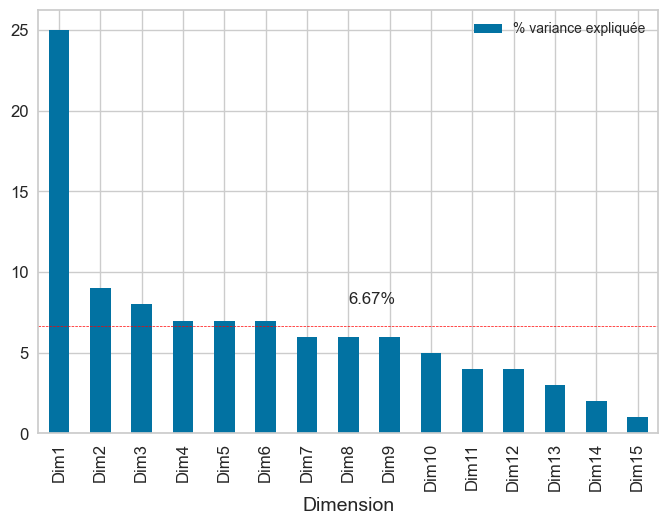

In [114]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # pour tracer un histogramme
plt.text(7, 8, "6.67%") # ajout de texte sur la ligne y=6.25
plt.axhline(y = 6.67, linewidth = .5, color = "red", linestyle = "--") # ligne à y=6.67 (car 100/15 ~ 6.67%) (15 = nb dimensions, 100 = 100% total de l'axe y)
plt.show()

Le cumul de %tage de variance expliquée pour 3 dimension est plutôt faible (42%) mais c'est notre seul moyen de pouvoir observer les données contenant 16 colonnes. On essaiera quand même de trouver une signification pour chacune des 3 premières dimensions même si cela ne représente pas parfaitement l'ensemble des données. La dimension 1 sera la plus significative à ce niveau

In [115]:
#Projection vectorielle
df_pca_proj = pca.transform(df1_scaler)

In [116]:
# Transformation de l'objet PCA en Dataframe
df_pca1 = pd.DataFrame({
    "Artist" : df2['artist'],
    "Song name" : df2['name'],
    "Dim1" : df_pca_proj[:,0], # dimension 1 (on sélectionne les dimensions)
    "Dim2" : df_pca_proj[:,1], # dimension 2
    "Cluster" : df2['cluster']
})

df_pca1

Artist                Song name      Dim1      Dim2  Cluster
0               Jim Hall    Concierto De Aranjuez  4.008628  2.567113        2
1              La Bronze               Formidable  0.177710  0.219110        6
2                  Rohff         La Grande classe -2.526141 -0.114579        5
3     The Blues Brothers           Jailhouse Rock -1.497398 -0.877920        5
4         Rag'n'Bone Man                    Human -1.843633 -1.489125        3
...                  ...                      ...       ...       ...      ...
3785               Hatik                   Angela -0.571418 -0.244343        6
3786            Yodelice        Sunday With A Flu -2.060751 -0.907223        5
3787     Sexion d'Assaut  J'suis pas dans le Game -1.471230 -0.444139        5
3788            Shirobon              Cyber Party -1.264950  1.265349        4
3789               Booba                    JAUNÉ -1.829284 -0.779415        5

[3790 rows x 5 columns]

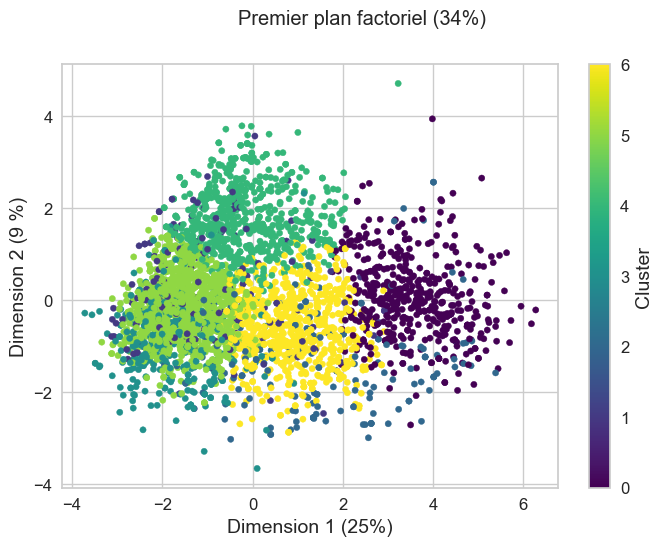

In [117]:
df_pca1.plot.scatter(x="Dim1", y="Dim2", c="Cluster", colormap='viridis')
plt.xlabel("Dimension 1 (25%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (9 %)") # modification du nom de l'axe Y
plt.suptitle("Premier plan factoriel (34%)") # titre du graphe
plt.show()

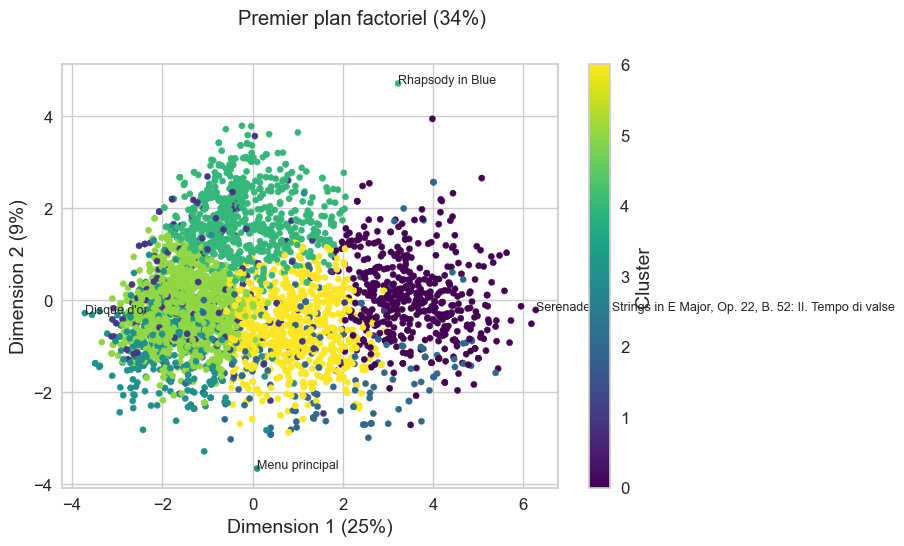

In [118]:
# Utilisation de subplots (nécessaire car on va annoter le graphique)
fig, ax = plt.subplots()
df_pca1.plot.scatter("Dim1", "Dim2", ax = ax, c="Cluster", colormap='viridis') # l'option ax permet de placer les points et le texte sur le même graphique

# On fait une boucle pour parcourir chaque pays
for k in df_pca1.iterrows():
    # Annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 6.2) | (abs(k[1]['Dim2']) > 4) | (k[1]['Dim2']<(-3.5)) | (k[1]['Dim1']<(-3.7)):
        ax.annotate(k[1]["Song name"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (25%)") 
plt.ylabel("Dimension 2 (9%)")
plt.suptitle("Premier plan factoriel (34%)")
plt.show()

In [119]:
#On observe les données aux extrémités
df[(df['name'] == 'Menu principal') | 
         (df['name'] == 'Disque d\'or') | 
         ((df['name'] == 'Rhapsody in Blue') & ((df['artist'] == 'Lang Lang'))) | 
         (df['name'] == 'Serenade for Strings in E Major, Op. 22, B. 52: II. Tempo di valse')]

name  \
1122                                   Rhapsody in Blue   
1853                                     Menu principal   
3489  Serenade for Strings in E Major, Op. 22, B. 52...   
3783                                        Disque d'or   

                                          album           artist release_date  \
1122                          New York Rhapsody        Lang Lang   2016-09-16   
1853                                    TRINITY           Laylow   2020-02-28   
3489  Dvořák: Serenade for Strings, Czech Suite   Antonín Dvořák   1991-01-01   
3783                                   L'Apogée  Sexion d'Assaut   2012-11-19   

       length  popularity  acousticness  danceability  energy  \
1122  1282306          26        0.9430         0.319  0.3570   
1853    31053          36        0.4390         0.527  0.1960   
3489   432533          69        0.7550         0.000  0.0842   
3783   280240          44        0.0778         0.845  0.9610   

      instrumentalness  ...  loudness  speechiness    tempo  valence  \
1122          0.906000  ...   -10.655        0.038   86.214   0.0911   
1853          0.000001  ...   -21.464        0.788  146.932   0.5220   
3489          0.889000  ...   -19.397        0.000    0.000   0.0000   
3783          0.000000  ...    -3.767        0.361  155.981   0.6120   

      time_signature  key  mode                                   uri  \
1122               4    2     1  spotify:track:5bqwObyJk2MgNOuNoaAHnR   
1853               1    1     1  spotify:track:0SqBlkhb8S17JgckYgTEbH   
3489               0    9     1  spotify:track:3sAYxq1986j3ydqLv6jwUJ   
3783               4    9     1  spotify:track:0g8OwnEszhZJM5yjy71ycp   

     release_year  top_year  
1122         2016      2019  
1853         2020      2020  
3489         1991      2020  
3783         2012      2022  

[4 rows x 21 columns]

In [120]:
n = df1_scaler.shape[0] # nombre d'individus
p = df1_scaler.shape[1] # nombre de variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées

for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': pd.DataFrame(df1_scaler).columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

id     COR_1     COR_2
0    0  0.151430  0.459681
1    1 -0.108290 -0.227362
2    2  0.759230 -0.439001
3    3 -0.701180 -0.275631
4    4 -0.852670  0.352664
5    5  0.501953  0.555339
6    6 -0.179156  0.000796
7    7 -0.869566  0.188390
8    8 -0.382725 -0.268536
9    9 -0.232661  0.265689
10  10 -0.654994 -0.437718
11  11 -0.354792  0.054402
12  12 -0.073144  0.052015
13  13  0.037915  0.001643
14  14 -0.255520  0.285309

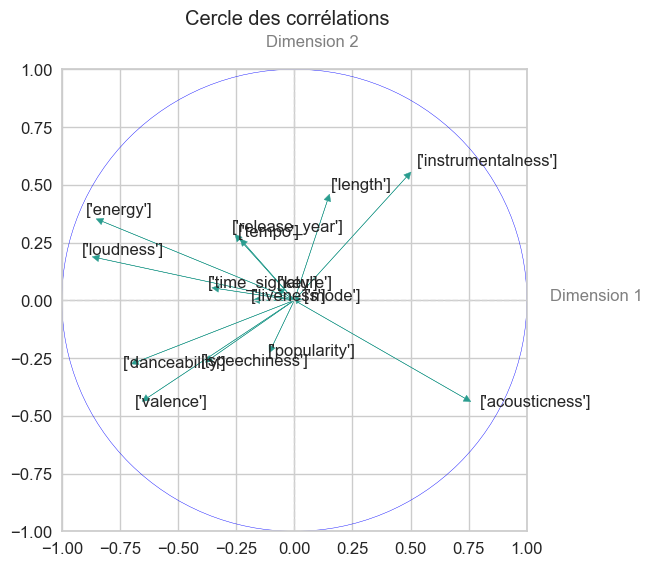

In [121]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.text(1.1,0, 'Dimension 1', color = 'gray')
axes.text(-0.12,1.1, 'Dimension 2', color = 'gray')

# Ajout des noms des variables
for j in range(p):
    axes.arrow(0, 0,  # Start the arrow at the origin
             coordvar["COR_1"][j],  #0 for PC1
             coordvar["COR_2"][j],  #1 for PC2
             head_width=0.03, 
             head_length=0.03,
             length_includes_head=True,
             color='#2a9d8f')
    axes.text(coordvar["COR_1"][j]*1.05,coordvar["COR_2"][j]*1.05, df1.columns[[j]].values)

# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

La première dimension du PCA semble opposer deux types de musique :

D'un côté, des morceaux calmes, doux, moins axés sur la danse, et avec une tonalité plus sérieuse ou mélancolique.

De l'autre, des morceaux qui sont probablement plus instrumentaux et acoustiques, suggérant une préférence pour la pureté du son instrumental et une ambiance plus naturelle ou organique.

La deuxième dimension ne peut pas être expliquée pour le moment
ue.

Essayons donc de l'expliquer en observant le deuxième plan vectoriel

In [122]:
# Transformation de l'objet PCA en Dataframe
df_pca2 = pd.DataFrame({
    "Artist" : df2['artist'],
    "Song name" : df2['name'],
    "Dim2" : df_pca_proj[:,1], # dimension 2 (on sélectionne les dimensions)
    "Dim3" : df_pca_proj[:,2], # dimension 3
    "Cluster" : df2['cluster']
})

df_pca2

Artist                Song name      Dim2      Dim3  Cluster
0               Jim Hall    Concierto De Aranjuez  2.567113  3.778754        2
1              La Bronze               Formidable  0.219110 -1.245337        6
2                  Rohff         La Grande classe -0.114579 -0.447800        5
3     The Blues Brothers           Jailhouse Rock -0.877920 -0.068705        5
4         Rag'n'Bone Man                    Human -1.489125 -0.342671        3
...                  ...                      ...       ...       ...      ...
3785               Hatik                   Angela -0.244343 -0.948089        6
3786            Yodelice        Sunday With A Flu -0.907223 -0.441141        5
3787     Sexion d'Assaut  J'suis pas dans le Game -0.444139  0.827397        5
3788            Shirobon              Cyber Party  1.265349  1.292480        4
3789               Booba                    JAUNÉ -0.779415  0.762796        5

[3790 rows x 5 columns]

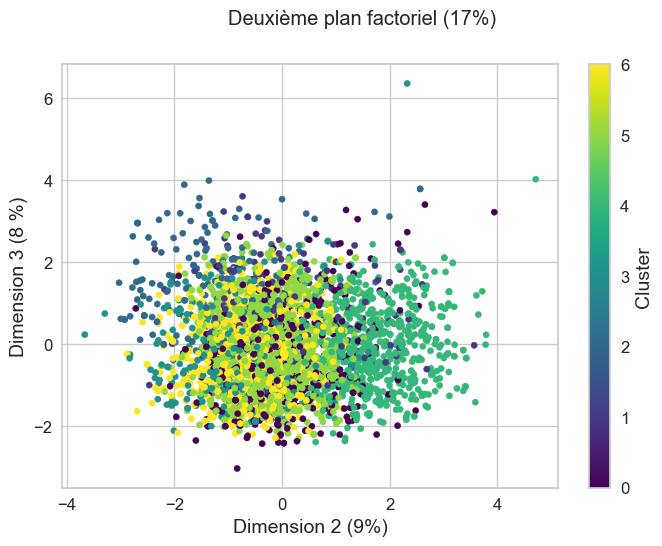

In [123]:
df_pca2.plot.scatter(x="Dim2", y="Dim3", c="Cluster", colormap='viridis')
plt.xlabel("Dimension 2 (9%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (8 %)") # modification du nom de l'axe Y
plt.suptitle("Deuxième plan factoriel (17%)") # titre du graphe
plt.show()

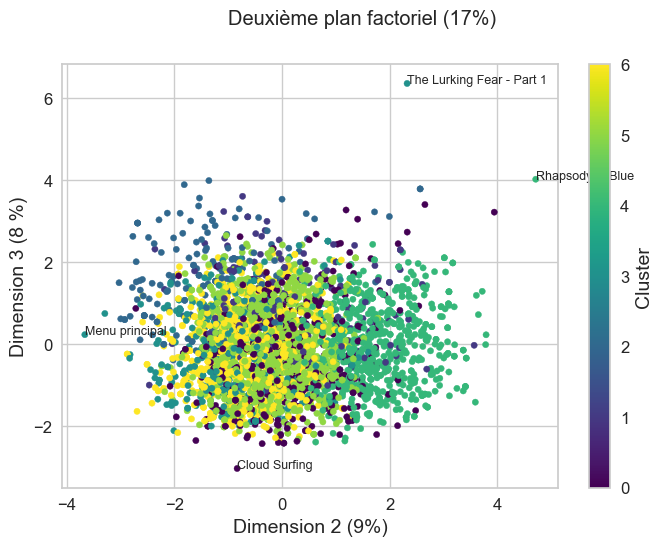

In [124]:
# Utilisation de subplots (nécessaire car on va annoter le graphique)
fig, ax = plt.subplots()
df_pca2.plot.scatter("Dim2", "Dim3", ax = ax, c="Cluster", colormap='viridis') # l'option ax permet de placer les points et le texte sur le même graphique

# On fait une boucle pour parcourir chaque pays
for k in df_pca2.iterrows():
    # Annotation uniquement si valeur sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim2']) > 4) | (abs(k[1]['Dim3']) > 4.5) | (k[1]['Dim3']<(-2.5)) | (k[1]['Dim2']<(-3.5)):
        ax.annotate(k[1]["Song name"], (k[1]['Dim2'], k[1]['Dim3']), fontsize = 9)
plt.xlabel("Dimension 2 (9%)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (8 %)") # modification du nom de l'axe Y
plt.suptitle("Deuxième plan factoriel (17%)") # titre du graphe
plt.show()

In [125]:
#On affiche les données aux extrémités:
df[(df['name'] == 'Menu principal') | 
         (df['name'] == 'Cloud Surfing') | 
         ((df['name'] == 'Rhapsody in Blue') & ((df['artist'] == 'Lang Lang'))) | 
         (df['name'] == 'The Lurking Fear - Part 1')]

name                                        album  \
1122           Rhapsody in Blue                            New York Rhapsody   
1493  The Lurking Fear - Part 1  HP Lovecraft - The Short Stories - Volume 1   
1853             Menu principal                                      TRINITY   
1884              Cloud Surfing                                Lofi Dreams 2   

               artist release_date   length  popularity  acousticness  \
1122        Lang Lang   2016-09-16  1282306          26         0.943   
1493   H.P. Lovecraft   2011-07-01  1921683          12         0.782   
1853           Laylow   2020-02-28    31053          36         0.439   
1884  Various Artists   2021-04-08    94004          45         0.935   

      danceability  energy  instrumentalness  ...  loudness  speechiness  \
1122         0.319   0.357          0.906000  ...   -10.655       0.0380   
1493         0.709   0.219          0.000000  ...   -21.231       0.9450   
1853         0.527   0.196          0.000001  ...   -21.464       0.7880   
1884         0.559   0.394          0.904000  ...   -16.183       0.0867   

        tempo  valence  time_signature  key  mode  \
1122   86.214   0.0911               4    2     1   
1493   83.123   0.5800               3    2     1   
1853  146.932   0.5220               1    1     1   
1884   68.258   0.1610               1   11     0   

                                       uri release_year  top_year  
1122  spotify:track:5bqwObyJk2MgNOuNoaAHnR         2016      2019  
1493  spotify:track:74WnJ5q7FiSzTfusZFpvyr         2011      2016  
1853  spotify:track:0SqBlkhb8S17JgckYgTEbH         2020      2020  
1884  spotify:track:5w5R4J7zOzfxN1AUmo2pPU         2021      2022  

[4 rows x 21 columns]

In [126]:
n = df1_scaler.shape[0] # nombre d'individus
p = df1_scaler.shape[1] # nombre de variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées

for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': pd.DataFrame(df1_scaler).columns, 'COR_2': corvar[:,1], 'COR_3': corvar[:,2]})
coordvar

id     COR_2     COR_3
0    0  0.459681  0.337369
1    1 -0.227362 -0.236419
2    2 -0.439001 -0.062695
3    3 -0.275631  0.029487
4    4  0.352664  0.043826
5    5  0.555339 -0.071199
6    6  0.000796  0.210833
7    7  0.188390  0.024577
8    8 -0.268536 -0.009068
9    9  0.265689 -0.119276
10  10 -0.437718  0.076381
11  11  0.054402  0.094349
12  12  0.052015 -0.577726
13  13  0.001643  0.639627
14  14  0.285309 -0.428970

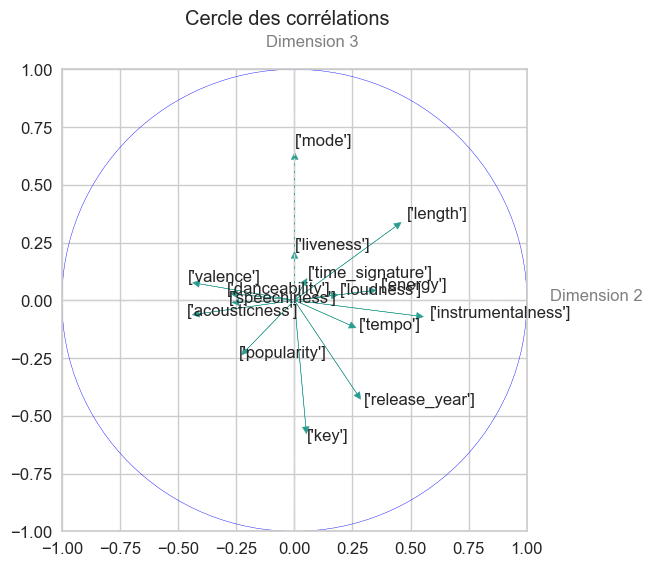

In [127]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.text(1.1,0, 'Dimension 2', color = 'gray')
axes.text(-0.12,1.1, 'Dimension 3', color = 'gray')

# Ajout des noms des variables
for j in range(p):
    axes.arrow(0, 0,  # Start the arrow at the origin
             coordvar["COR_2"][j],  #1 for PC2
             coordvar["COR_3"][j],  #2 for PC3
             head_width=0.03, 
             head_length=0.03,
             length_includes_head=True,
             color='#2a9d8f')
    axes.text(coordvar["COR_2"][j]*1.05,coordvar["COR_3"][j]*1.05, df1.columns[[j]].values)

# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

Dimension 2: Cette dimension pourrait représenter un contraste entre des morceaux plus longs, énergiques, et instrumentaux, et ceux qui sont plus courts, moins énergiques, avec une valence plus élevée (plus joyeux) et une tendance vers l'acoustique.

Dimension 3: Cette dimension se concentre sur la qualité émotionnelle ou l'humeur (majeur vs mineur) des morceaux, plutôt que sur leur tonalité spécifique.

In [128]:
# Transformation de l'objet PCA en Dataframe
df_pca3 = pd.DataFrame({
    "Dim1" : df_pca_proj[:,0], # dimension 1 
    "Dim2" : df_pca_proj[:,1], # dimension 2 
    "Dim3" : df_pca_proj[:,2], # dimension 3
})

df_pca3

Dim1      Dim2      Dim3
0     4.008628  2.567113  3.778754
1     0.177710  0.219110 -1.245337
2    -2.526141 -0.114579 -0.447800
3    -1.497398 -0.877920 -0.068705
4    -1.843633 -1.489125 -0.342671
...        ...       ...       ...
3785 -0.571418 -0.244343 -0.948089
3786 -2.060751 -0.907223 -0.441141
3787 -1.471230 -0.444139  0.827397
3788 -1.264950  1.265349  1.292480
3789 -1.829284 -0.779415  0.762796

[3790 rows x 3 columns]

Visualisation 3D:

In [129]:
# On représente graphiquement le résultat à l'aide de la fonction scatter_3d() de Plotly Express 
fig = px.scatter_3d(df_pca3,
                    x="Dim1", 
                    y="Dim2", 
                    z="Dim3",
                    color=df2['cluster'],)

# Affichez le tracé
fig.show()

On observe une mauvaise répartition des clusters --> ils ne sont pas assez distincts ce qui explique que des playlists contiennent plus de 100 musiques.

Prenons l'exemple du cluster 0: 
- Dim 1 élevé --> Des morceaux calmes, doux, moins axés sur la danse, et avec une tonalité plus sérieuse ou mélancolique.
- Dim 3 plutôt faible --> Cela pourrait indiquer une variété ou une complexité plus grande en termes de tonalités utilisées dans les morceaux de ce cluster.
- Dim 2 dans la moyenne --> Pas vraiment de commentaire à donner

Ce qui correspond plutôt bien avec la caractérisation que l'on a essayé de faire plus tôt en fonction des moyennes des différentes caractéristiques des morceaux présents dans ce cluster: "Le Cluster 0 (utilisateur 1) semble regrouper des morceaux calmes, instrumentaux, et acoustiques, avec un tempo lent et une valence faible. Ces caractéristiques suggèrent des genres tels que la musique classique douce, le jazz ambiant, ou peut-être des morceaux acoustiques folkloriques. La faible popularité indique que ces morceaux pourraient être de niche ou moins connus du grand public."